# 목차

1. 패키지 설치 및 로드
2. EDA
3. 시계열 분해 및 회귀분석을 이용한 예측
4. 지수평활을 이용한 예측
5. 이동평균을 이용한 예측
6. ARIMA를 이용한 예측 (1. 로그변환, 2. 박스칵스 변환)


# 시계열 분석

- 시계열: 연도별, 분기별, 월별, 일별 혹은 시간별 등 시간의 경과(흐름)에 따라 동일 간격으로 측정한 데이터의 수열.
    - 시계열 자료는 시간의 경과에 따라 관측된 자료이므로 시간에 영향을 받는다.


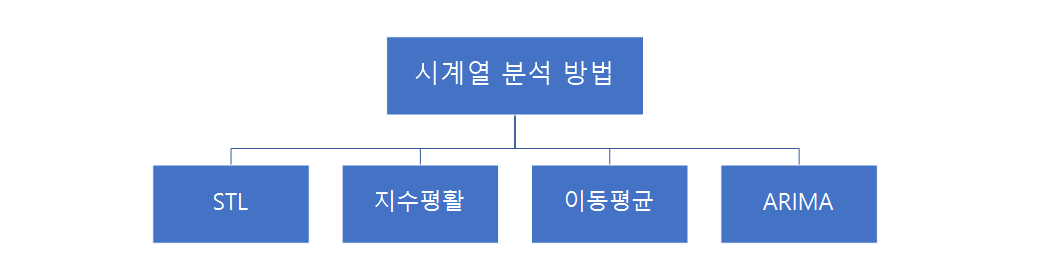

# # 0. install/load packages

In [2]:
# install.packages('forecast') 
# install.packages('tseries')
# install.packages('ggplot2')
# install.packages('reshape')
# install.packages('zoo')
# install.packages('fUnitRoots')

library(forecast) # 시계열 자료의 시각화, 분석방법 및 도구 제공.
library(tseries)
library(ggplot2)
library(reshape)
library(zoo)
library(fUnitRoots)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




# # 1. Data Load

R base에서 기본으로 제공하는 AirPassengers 데이터를 불러오겠습니다. 데이터는 미국 Pan Am 항공사의 1949년 ~ 1960년 까지의 월별 비행기 탑승객 수(단위: 천 명)에 관한 데이터입니다.

In [3]:
origin <- AirPassengers
origin

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


## 시계열 데이터 객체

R에서는 일반적으로 데이터 프레임에 데이터를 저장하는 경우가 많습니다. 시계열 데이터도 데이터프레임에 저장할 수 있습니다. 하지만 시계열 데이터는 시간 인덱스를 기반으로 검색, 분할, 집계, 병합과 같은 데이터 처리가 이루어지기 때문에 데이터 프레임보다는 시계열 데이터 객체에서 처리하는 것이 효과적입니다.

R에서는 시간 인덱스를 기반으로 데이터를 처리하기 위한 시계열 데이터 객체를 제공하고 있습니다. R에서 사용할 수 있는 시계열 데이터 객체는 R 자체적으로 제공하는 객체도 있지만, 시계열 패키지를 통해 제공되는 객체도 있습니다.

In [4]:
class(origin) # ts객체

[1] "ts"

- ts객체는 R에서 기본적으로 제공되는 시계열 데이터 타입입니다. ts 객체는 stats 패키지를 로딩해야 사용할 수 있지만, stats 패키지는 R이 실행될 때 기본적으로 로딩되기 때문에 바로 활용할 수 있습니다. 또한 stats 패키지에서 제공하는 다양한 시계열 데이터 처리 함수를 다루기 때문에 많이 사용됩니다.

In [5]:
start(origin) # 자료의 시작점

[1] 1949    1

In [6]:
end(origin) # 자료의 끝점

[1] 1960   12

In [7]:
frequency(origin) # 단위 시간당 관측 수 (월별 자료는 12)

[1] 12

In [8]:
cycle(origin)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,1,2,3,4,5,6,7,8,9,10,11,12
1950,1,2,3,4,5,6,7,8,9,10,11,12
1951,1,2,3,4,5,6,7,8,9,10,11,12
1952,1,2,3,4,5,6,7,8,9,10,11,12
1953,1,2,3,4,5,6,7,8,9,10,11,12
1954,1,2,3,4,5,6,7,8,9,10,11,12
1955,1,2,3,4,5,6,7,8,9,10,11,12
1956,1,2,3,4,5,6,7,8,9,10,11,12
1957,1,2,3,4,5,6,7,8,9,10,11,12
1958,1,2,3,4,5,6,7,8,9,10,11,12


- ts객체가 아닌경우에는? $\to$ ts객체로 변환

- **`ts(data, start, end, frequency)`**
    - data: 시계열 데이터로 변환 시키고자 하는 벡터
    - start: 자료의 시작 시점 지정
    - end: 자료의 끝점 지점
    - freq: 단위시간 당 관측 수

In [9]:
# ts객체로 변환
ex1 <- rnorm(144) 
class(ex1)

[1] "numeric"

In [10]:
ex1 <- ts(ex1, start=c(2023,1), frequency = 12)
class(ex1)

[1] "ts"

# # 2. EDA

시계열분석시 가장 선행되어야 할 일은 시도표(Line Plot)^[한 축에는 시간을, 다른 축에는 관측치를 놓은 Line Plot]을 그려보는 것입니다.

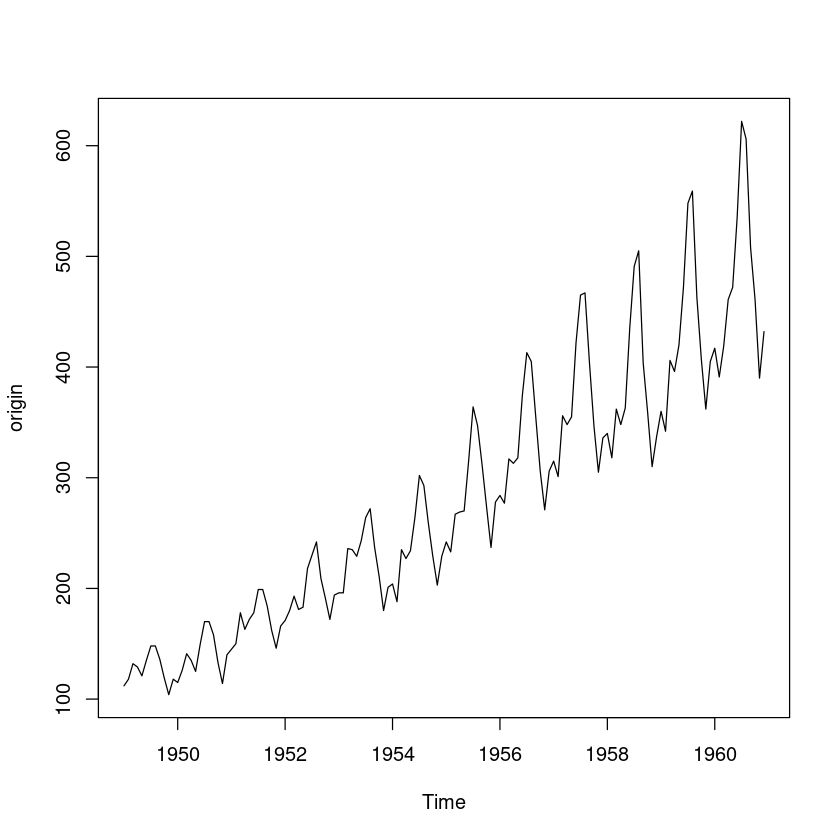

In [11]:
# 시도표
plot(origin)

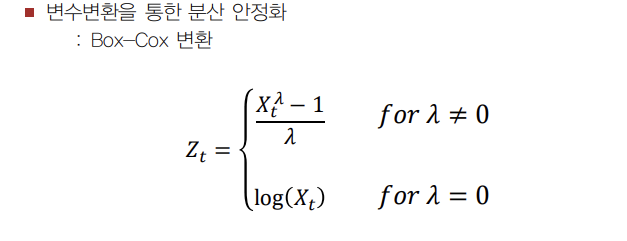

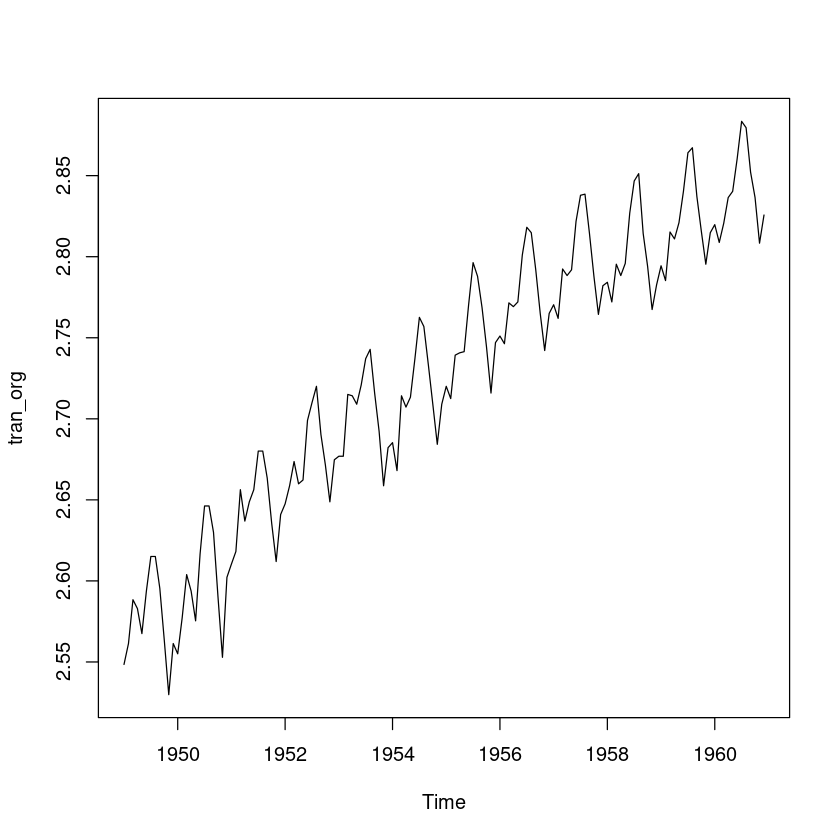

In [12]:
#분산 안정화를 위한 BoxCox 변환
lambda <- BoxCox.lambda(origin)
tran_org <- BoxCox(origin, BoxCox.lambda(origin))
plot(tran_org)

- 위의 그림은 분산 안정화를 위한 BoxCox 변환을 한 후의 시도표를 그린 것입니다. 여기서는 BoxCox 변환을 사용하였지만 실제 분석에서는 로그 변환 혹은 sqrt변환을 많이 사용합니다. (BoxCox 변환은 log, sqrt변환을 포함하고 있는 확장 버전(일반화된 버전)이라고 보시면 됩니다.)

`-` $\text{BoxCox}$ vs. $\log$ vs. $\text{sqrt}$

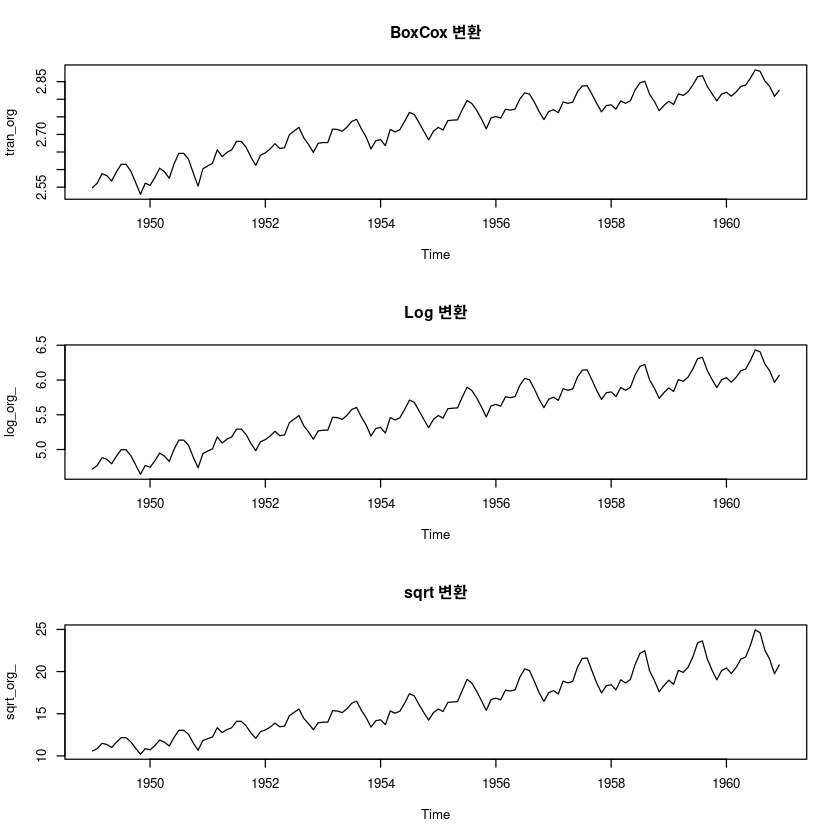

In [13]:
par(mfrow=c(3,1))

tran_org <- BoxCox(origin, BoxCox.lambda(origin))
plot(tran_org, main='BoxCox 변환')

log_org_ <- log(origin)
plot(log_org_, main='Log 변환')

sqrt_org_ <- sqrt(origin)
plot(sqrt_org_, main='sqrt 변환')

- 여기서 BoxCox변환은 분산안정화를 위한것입니다.

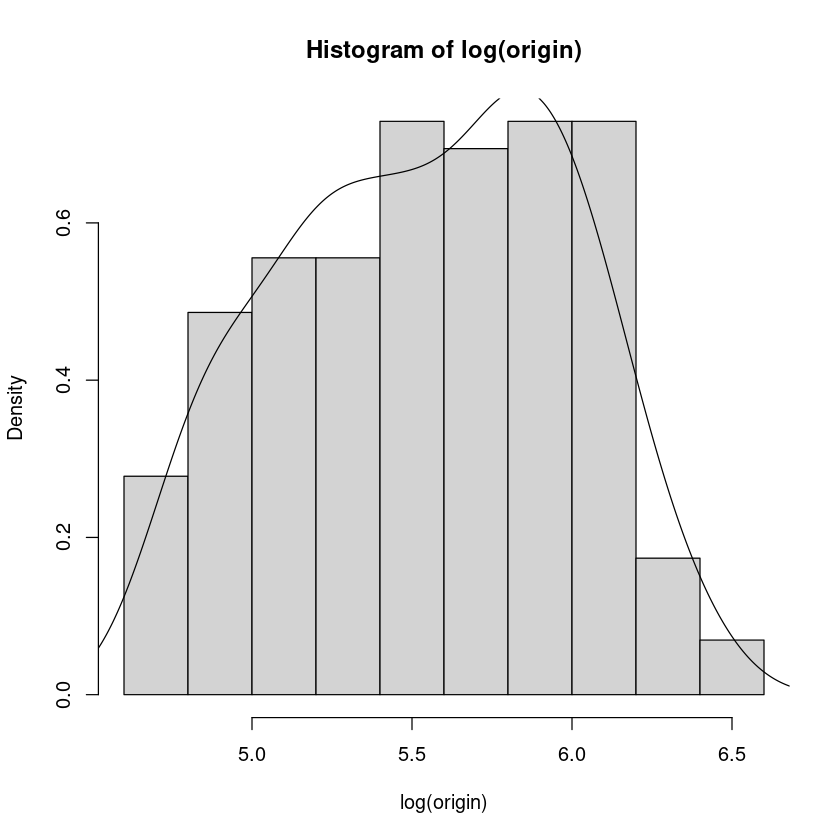

In [14]:
# 정규성 및 Corr
# Hist Plot
hist(log(origin),prob=TRUE,12)
lines(density(log(origin)))

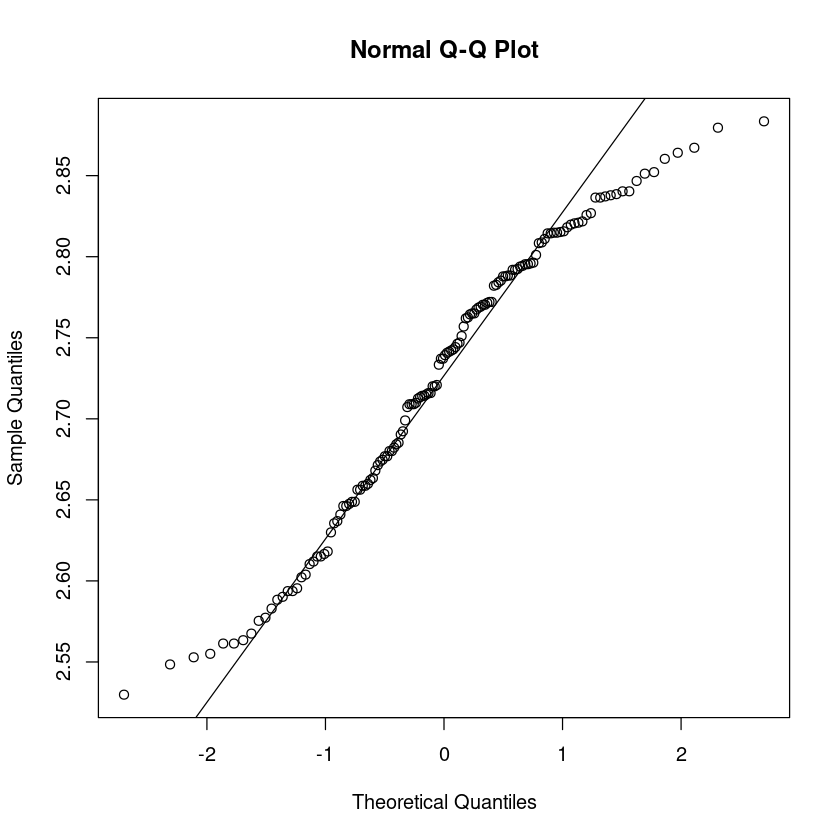

In [15]:
# Q-Q PLOT
qqnorm(tran_org)
qqline(tran_org)

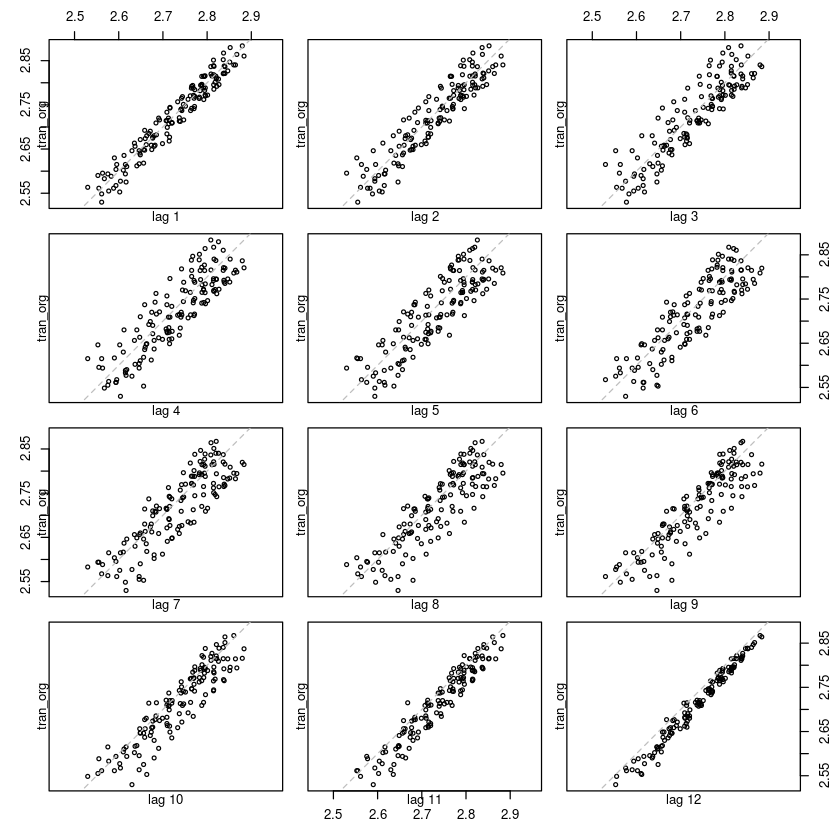

In [16]:
# 상관관계 확인
lag.plot(tran_org,12,do.lines=FALSE)

# # 3. 시계열 분해 및 회귀분석 이용 예측

> Seasonal과 Trend를 분해하고 다항식을 이용하여 예측해봅시다.

## 3-1. 시계열 분해

- 시계열 분해법: 시계열 구성요인^[추세(Trend), 순환(Cycle), 계절(Seasonal), 불규칙 요인(Random)] 별로 분해하여 파악.
    - 추세요인: 데이터가 장기적으로 변해가는 큰 흐름.
    - 순환요인: 2~3년 정도의 주기로 순환적으로 나타나는 추세의 경향^[경제학에서는 경기순환(business cycle)이라는 용어를 사용하기도 하며, 50년 내지, 60년 주기를 갖는 콘트라디에프 주기 등이 그 예이다.]
    - 계절요인: 계절을 주기로 나타나는 변동 요인
    - 불규칙요인: 우연에 의해 발생한 변동요인

::: {.callout-note}

**(참고)**
순환요인과 계절요인 둘 다 "일정 주기에 따라 반복되는 패턴으로 나타난다" 라는 공통점이 있지만 순환요인의 경우 2~3년 주기로 반복되는 패턴을 나타내는 것이기 때문에 실제로 확인이 어렵기 때문에 일반적으로 고려하지 않습니다.
:::

시계열 데이터를 분해하는 방법에는 덧셈 방법(additive)과 곱셈방법(multiplicative)의 두 가지가 있습니다.

`-` 가법모형(Additive model)^[각각의 성분을 더한다. // 더하는 모형~]

- 계절 요인의 분산이 일정할 때
- 모형식: $Z_t = T_t + C_t + S_t + I_t$
    - $Z_t$ : Time series value at period $t$
    - $T_t$: Trend component at period $t$
    - $I_t$: Irregular (or Remainder / Random) component at period $t$.

`-` 승법모형(Multiplicative model)^[각각의 성분을 곱한다. // 곱하는 모형~]

- 계절 요인의 분산이 달라짐.^[계절성의 변화량이 증가 혹은 감소]
- 모형식: $Z_t = T_t\cdot C_t \cdot S_t \cdot I_t$

`1` using `stl()` 

In [17]:
#분해법 : 가법모형 (계절요인의 분산이 일정할 때) 
# y_t = season_t + trend_t + noise
stl_tran_org <- stl(tran_org, s.window = 12) # s.window: 계절성의 주기

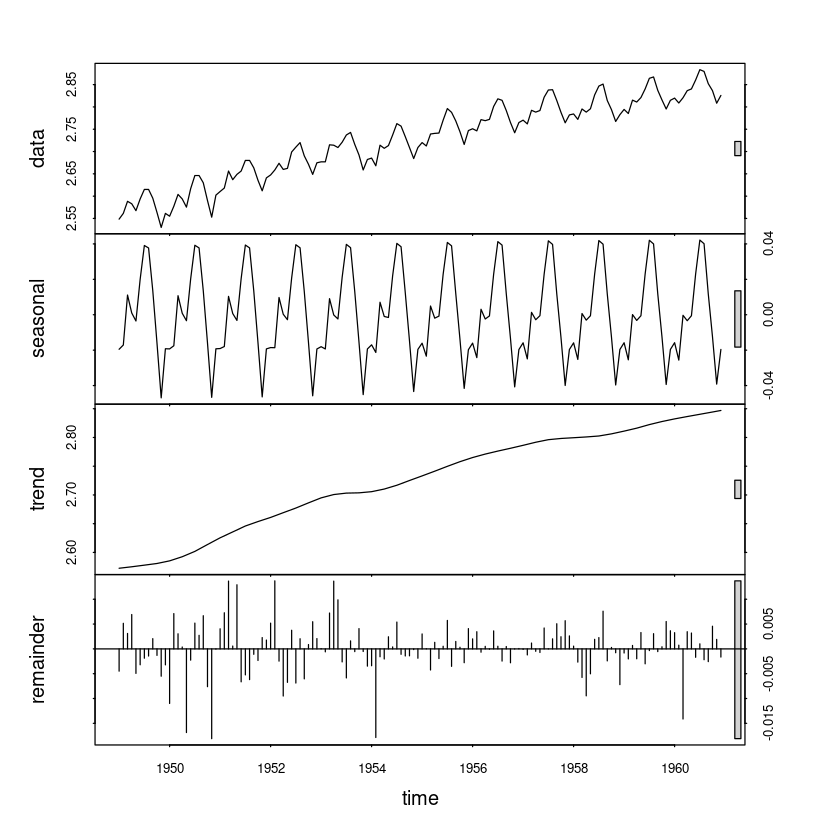

In [18]:
plot(stl_tran_org)

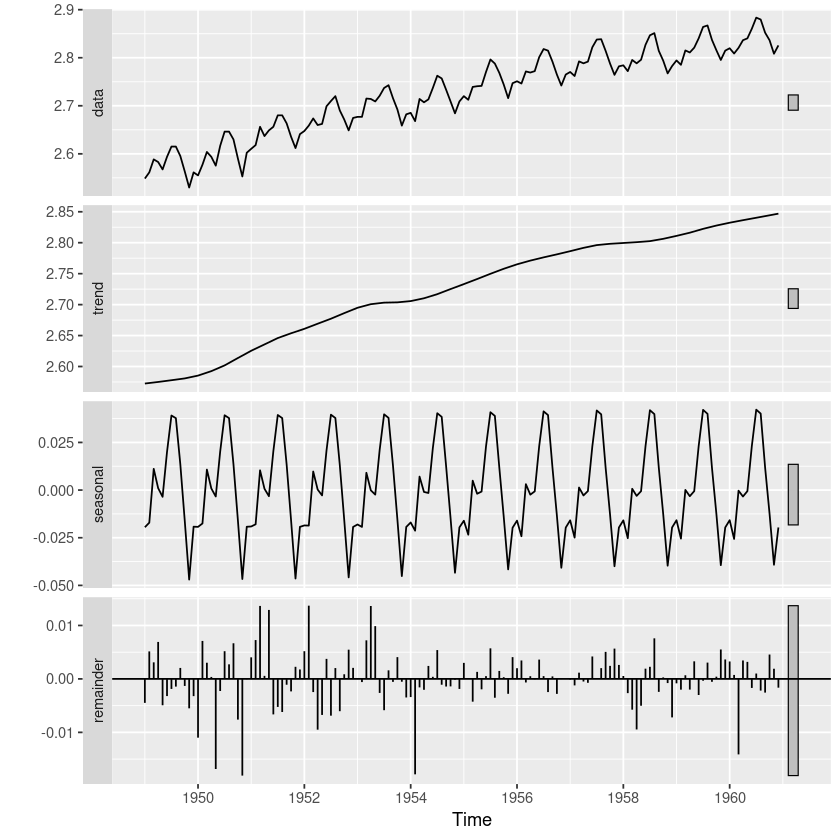

In [19]:
# 좀 더 예쁘게...
stl_tran_org %>% autoplot()

- stl()은 곱셈방법을 지원하지 않음.

`2` using `decompose()`

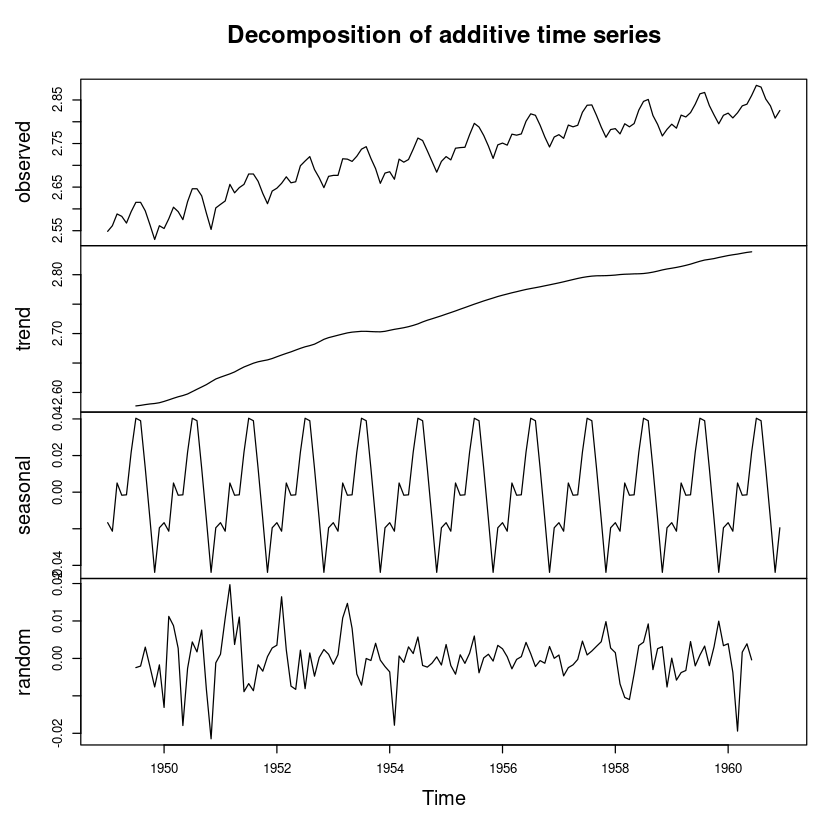

In [20]:
# 가법모형
plot(decompose(tran_org, type = "additive"))

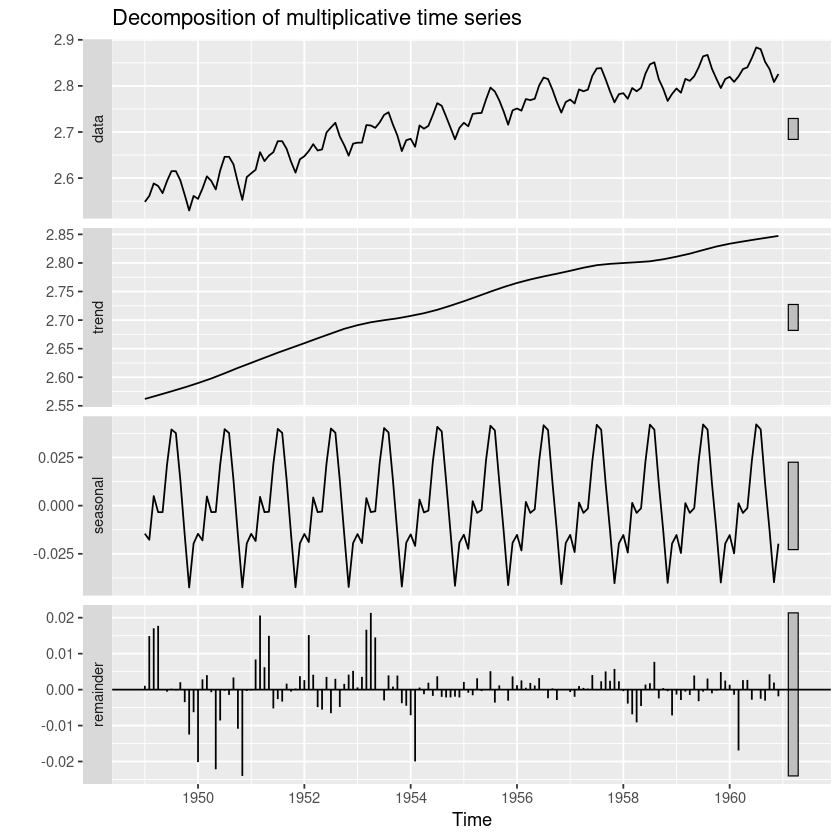

In [21]:
# 좀 더 예쁘게...
tran_org %>%
    stl(s.window=12, robust=TRUE) %>%
    autoplot(main = 'Decomposition of multiplicative time series')

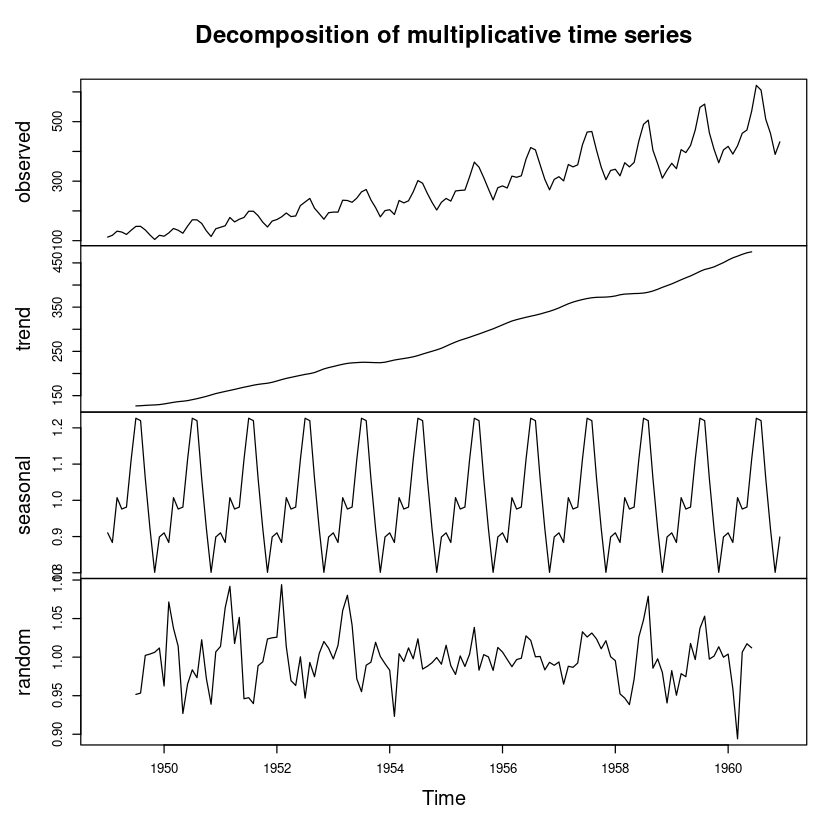

In [22]:
# 승법모형
plot(decompose(origin, type= "multiplicative"))

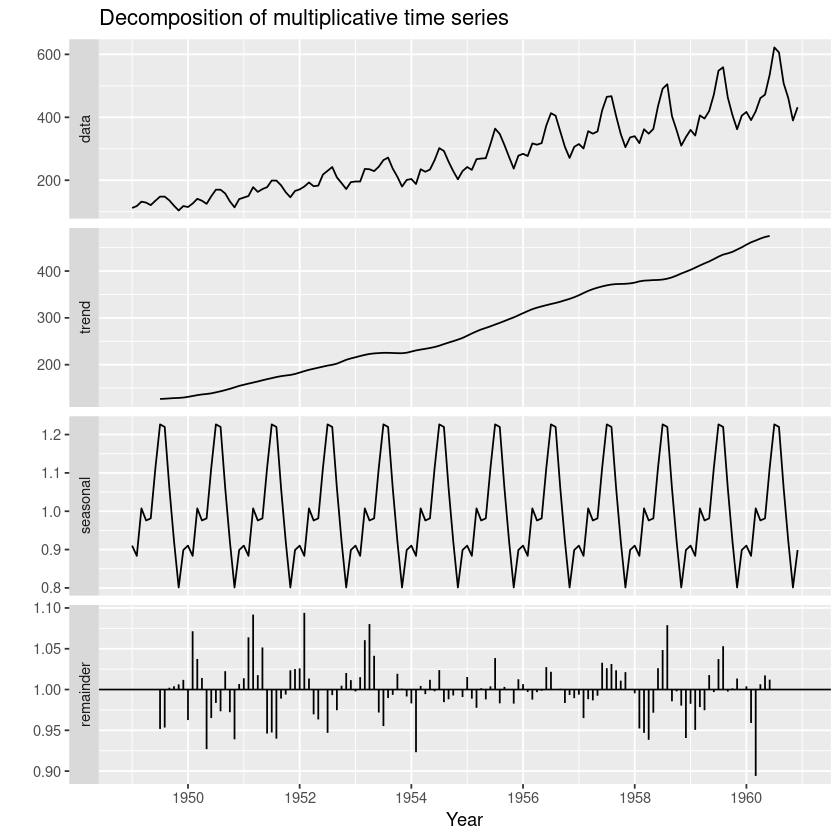

In [23]:
# 좀 더 예쁘게...
origin %>% decompose(type="multiplicative") %>%
    autoplot() + xlab("Year") +
    ggtitle("Decomposition of multiplicative time series")

`-` 각각의 분해한 것을 합치면?

In [24]:
# 가법모형에 대해 생각해보자.
y <- as.data.frame(stl_tran_org$time.series)
y1 <- y$seasonal # seasonal
y2 <- y$trend # trend
y3 <- y$remainder # remainder

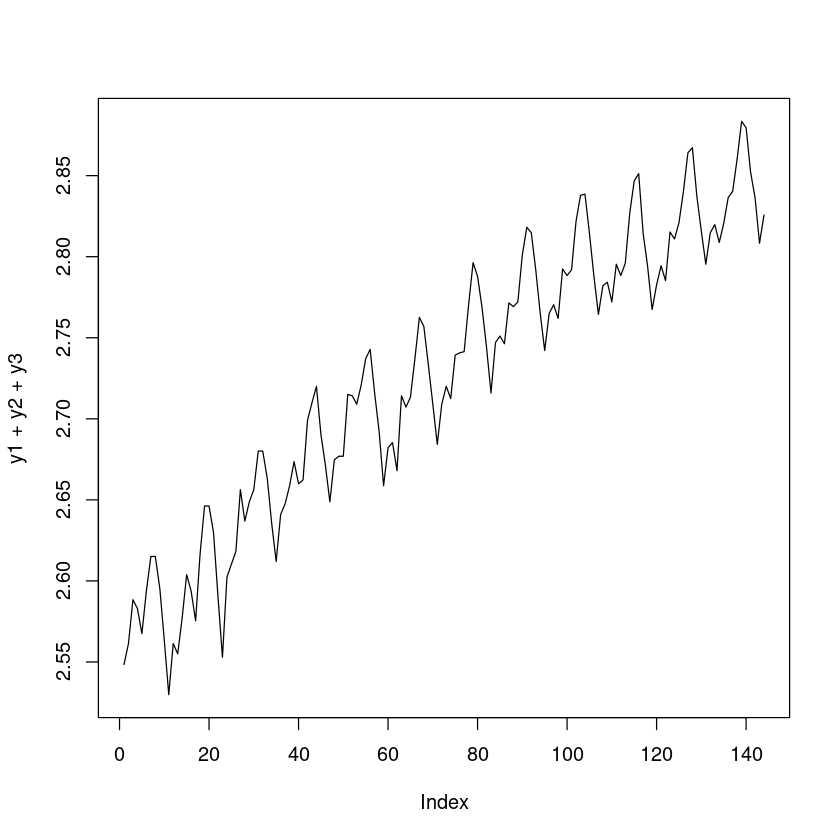

In [25]:
plot(y1+y2+y3, type='l')

**(참고)** `autoplot()` 은 ggplot2에서 제공하는 함수지만 ggplot2에서는 ts데이터 클래스를 지원하지 않습니다. 따라서 autoplot()에 전달된 데이터가 ts 데이터 클래스인 경우는 ggplot2 패키지의 autoplot()이 아닌 forecast에서 제공하는 autoplot()을 호출하여 플롯을 생성합니다.

## 3-2. 회귀분석

In [26]:
# 회귀모형 
# 계절형 Dummy 변수 생성
M <- factor(cycle(tran_org))
M

[1] 1  2  3  4  5  6  7  8  9  10 11 12 1  2  3  4  5  6  7  8  9  10 11 12 1 
 [26] 2  3  4  5  6  7  8  9  10 11 12 1  2  3  4  5  6  7  8  9  10 11 12 1  2 
 [51] 3  4  5  6  7  8  9  10 11 12 1  2  3  4  5  6  7  8  9  10 11 12 1  2  3 
 [76] 4  5  6  7  8  9  10 11 12 1  2  3  4  5  6  7  8  9  10 11 12 1  2  3  4 
[101] 5  6  7  8  9  10 11 12 1  2  3  4  5  6  7  8  9  10 11 12 1  2  3  4  5 
[126] 6  7  8  9  10 11 12 1  2  3  4  5  6  7  8  9  10 11 12
Levels: 1 2 3 4 5 6 7 8 9 10 11 12

In [27]:
stl_tran_org_df <- as.data.frame(stl_tran_org$time.series)
head(stl_tran_org_df)

,seasonal,trend,remainder
,<dbl>,<dbl>,<dbl>
1,-0.0195009846,2.572470,-0.004485195
2,-0.0170966571,2.573324,0.005147320
3,0.0111248690,2.574178,0.003105273
4,0.0009896123,2.575032,0.006915958
5,-0.0035318860,2.575972,-0.004933871
6,0.0200103731,2.576911,-0.003201882


`-` 회귀모형 생성

$$tranorg = trend\cdot \beta_1 + M1\cdot \beta_2 + \cdots + M12\cdot \beta_{12} + \epsilon$$

In [28]:
model_stl <- lm(formula = tran_org~ 0+stl_tran_org_df$trend+M, na.action = NULL)
summary(model_stl)


Call:
lm(formula = tran_org ~ 0 + stl_tran_org_df$trend + M, na.action = NULL)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0208982 -0.0030056  0.0003675  0.0032375  0.0186285 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
stl_tran_org_df$trend  1.003132   0.006557 152.982  < 2e-16 ***
M1                    -0.025890   0.017899  -1.446  0.15043    
M2                    -0.029141   0.017911  -1.627  0.10614    
M3                    -0.002850   0.017923  -0.159  0.87389    
M4                    -0.009503   0.017936  -0.530  0.59713    
M5                    -0.010617   0.017948  -0.592  0.55519    
M6                     0.012901   0.017961   0.718  0.47386    
M7                     0.032071   0.017974   1.784  0.07669 .  
M8                     0.030402   0.017986   1.690  0.09335 .  
M9                     0.004045   0.017998   0.225  0.82255    
M10                   -0.023032   0.018011  -1.279  0.20322    
M11          

- 1월의 효과, 2월의 효과, $\dots$

In [29]:
model_stl2 <- lm(formula = tran_org~ stl_tran_org_df$trend+M, na.action = NULL) # 1월과 2월의 차이, 1월과 3월의 차이..
summary(model_stl2) 


Call:
lm(formula = tran_org ~ stl_tran_org_df$trend + M, na.action = NULL)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0208982 -0.0030056  0.0003675  0.0032375  0.0186285 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -0.025890   0.017899  -1.446    0.150    
stl_tran_org_df$trend  1.003132   0.006557 152.982  < 2e-16 ***
M2                    -0.003251   0.002673  -1.216    0.226    
M3                     0.023039   0.002673   8.618 1.91e-14 ***
M4                     0.016387   0.002674   6.129 9.67e-09 ***
M5                     0.015273   0.002674   5.712 7.14e-08 ***
M6                     0.038791   0.002674  14.506  < 2e-16 ***
M7                     0.057961   0.002674  21.673  < 2e-16 ***
M8                     0.056291   0.002675  21.045  < 2e-16 ***
M9                     0.029934   0.002675  11.190  < 2e-16 ***
M10                    0.002857   0.002676   1.068    0.288    
M11              

- 1월과 2월의 차이($\text{M2}-\text{M1})$, 1월과 3월의 차이($\text{M3}-\text{M1}$), $\cdots$, 12월과 1월의 차이($\text{M12}-\text{M1})$

`-` 잔차 검정

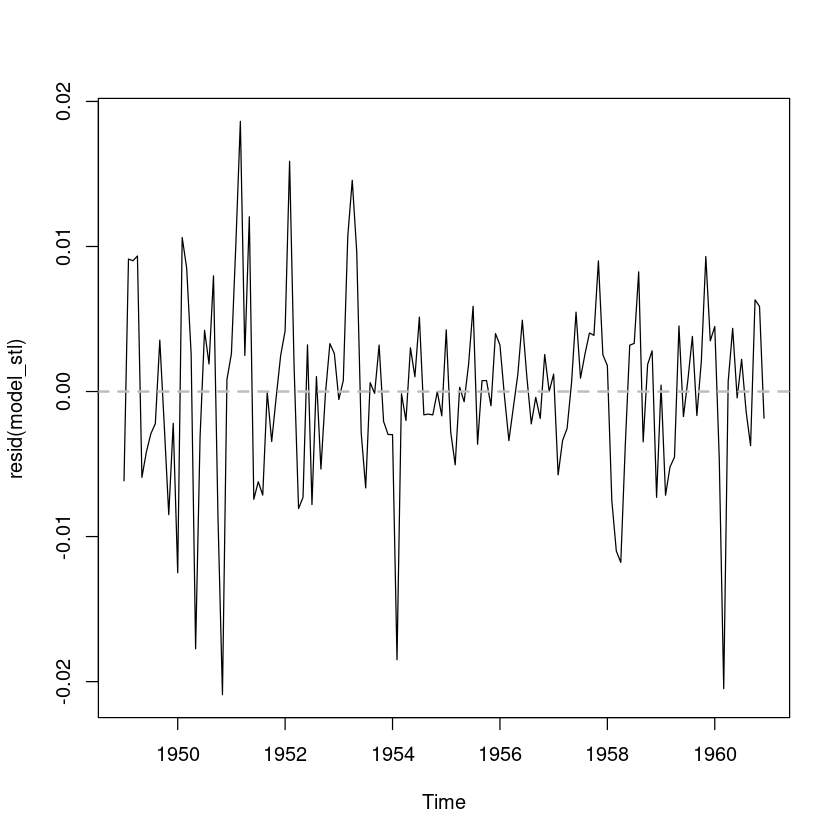

In [30]:
# time Plot
plot(resid(model_stl))
abline(h=0, col='grey', lty=2, lwd=2)

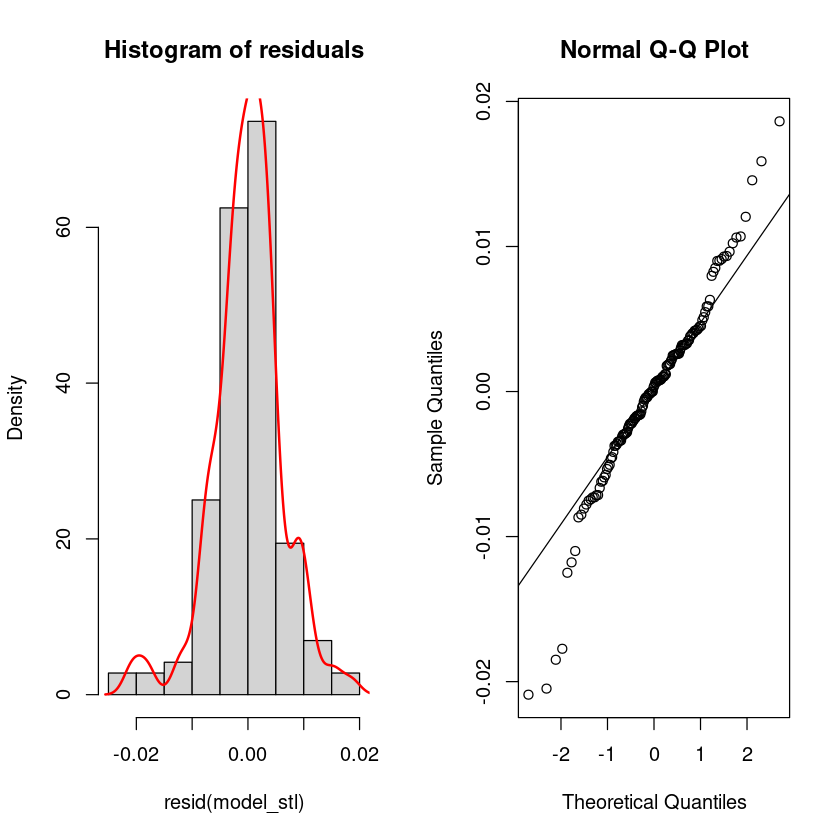

In [31]:
par(mfrow=c(1,2))
# Hist Plot
hist(resid(model_stl),prob=TRUE,12, main = "Histogram of residuals")
lines(density(resid(model_stl)), col='red', lwd=2)
# Q-Q PLOT
qqnorm(resid(model_stl))
qqline(resid(model_stl))
par(mfrow=c(1,1))

In [32]:
# DW test (오차의 독립성 검정)
library(lmtest)
dwtest(model_stl) # white noise X


	Durbin-Watson test

data:  model_stl
DW = 1.4677, p-value = 0.001001
alternative hypothesis: true autocorrelation is greater than 0


`-` 회귀모형 예측 결과 확인

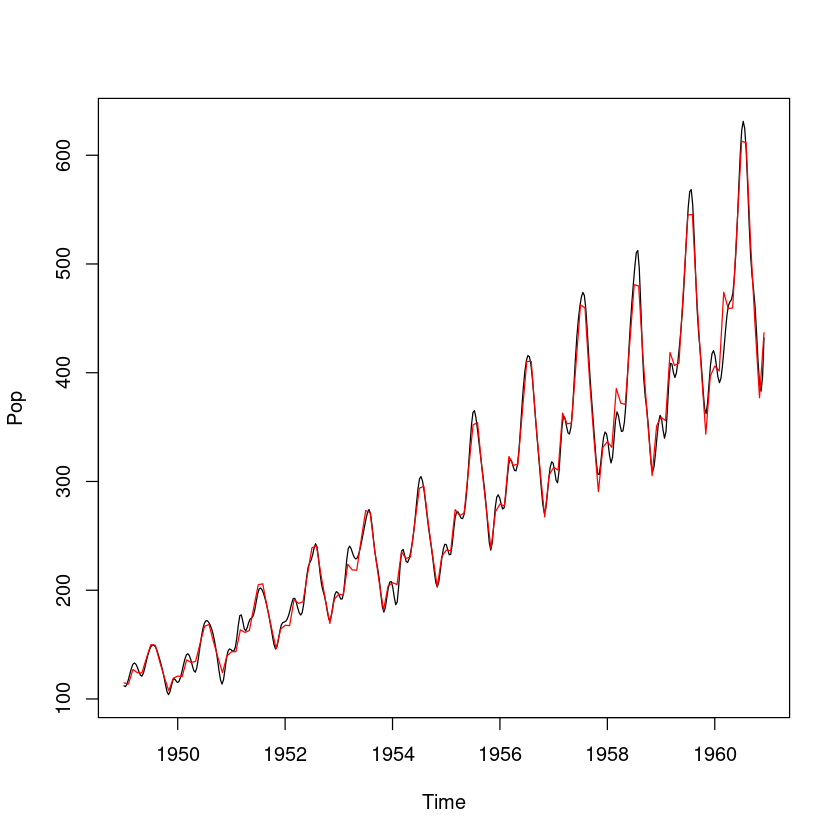

In [33]:
# 원 데이터 및 fitted 데이터의 비교
plot(spline(time(origin), origin),type='l',xlab='Time',ylab='Pop')

# BoxCox 역변환 필요함
lines(InvBoxCox(model_stl$fitted.values, lambda = BoxCox.lambda(origin)), col='red')

In [34]:
# mse
mean((origin - InvBoxCox(model_stl$fitted.values, lambda = BoxCox.lambda(origin)))^2,na.rm = TRUE)  #MSE

[1] 81.14211

# # 4. 지수평활을 이용한 예측

- **평활(Smoothing)** : 변화 폭이 심한 시계열을 평탄하고 완만한 값으로 변화시키는 것.

- 지수평활의 특징: 최근 값으로부터 과거 값까지 지수적 감소(Exponential Decay)형태의 가중치를 사용.

1. 단순지수 평활: 추세나 계절적 변동이 없는 시계열 예측에 사용.
2. 이중지수 평활: 추세가 있는 시계열 예측에 사용 
3. Holt-Winters: 추세와 계절요인이 있는 시계열 예측에 사용.

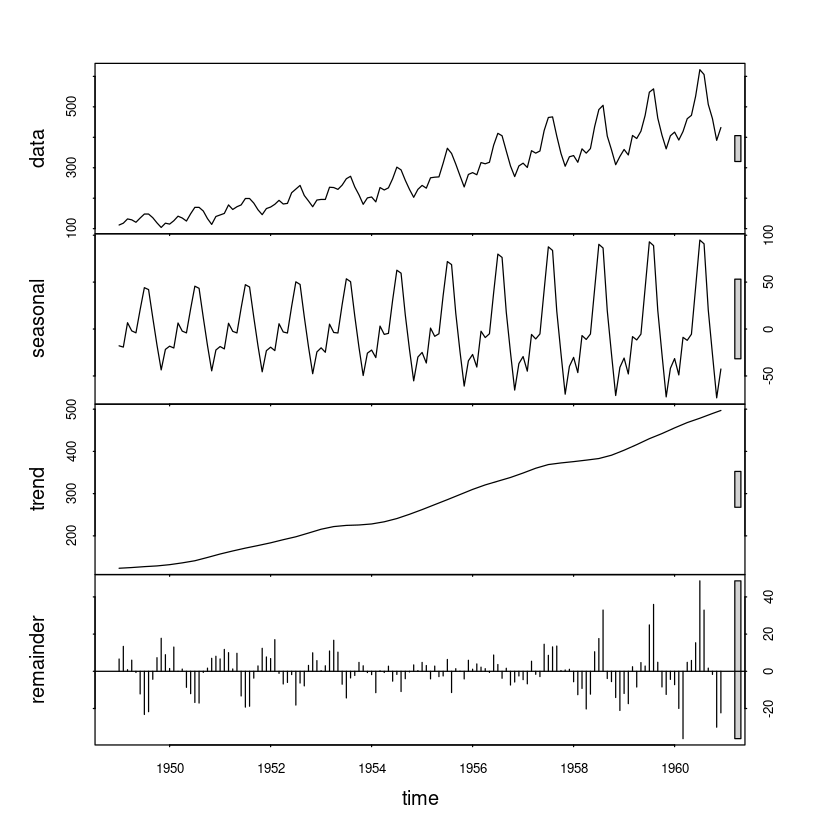

In [35]:
plot(stl(origin, s.window=12))
# Trend 및 Seasonality 존재
# Holt-Winter 지수평활 모형이 적합

In [36]:
#HoltWinters 모형 생성
model_es <- HoltWinters(origin, seasonal = "multiplicative") # 승법모형을 적용 
#model_es <- HoltWinters(origin, beta=F, gamma=F, seasonal = "multiplicative") #단순지수 평활 모형을 사용하고 싶다면, beta=F, gamma=F 추가.
#model_es <- HoltWinters(origin, gamma=F, seasonal = "multiplicative") #이중지수 평활 모형을 사용하고 싶다면, gamma=F 추가.

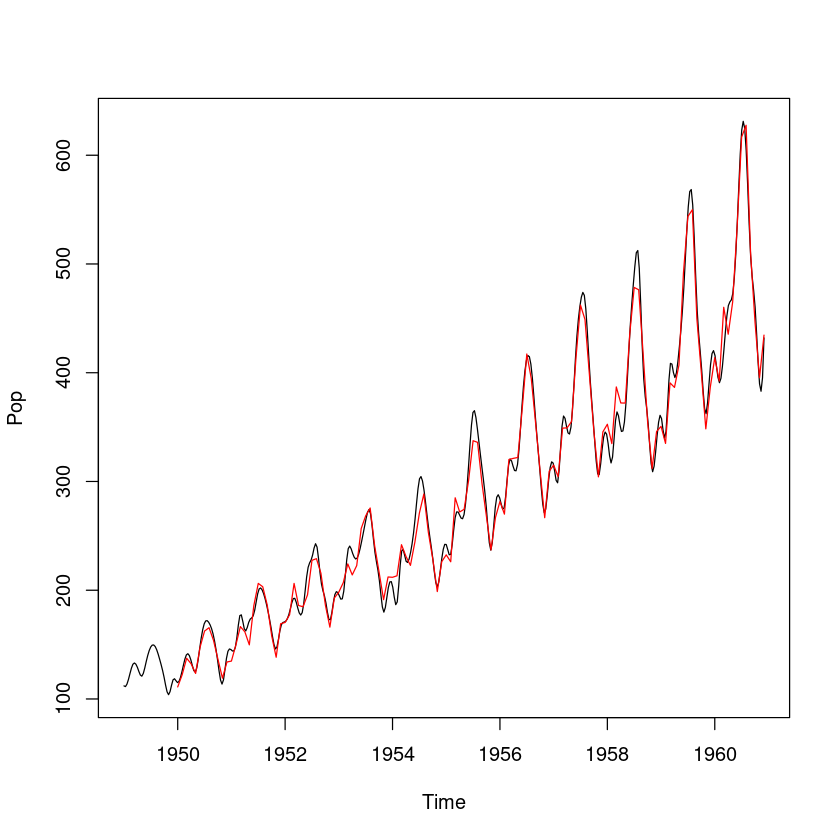

In [37]:
# 원 데이터 및 fitted 데이터의 비교
# plot
plot(spline(time(origin), origin),type='l',xlab='Time',ylab='Pop')
lines(model_es$fitted[,1], col='red')

In [38]:
# mse 125.5
mean((origin-model_es$fitted[,1])^2)

[1] 125.5362

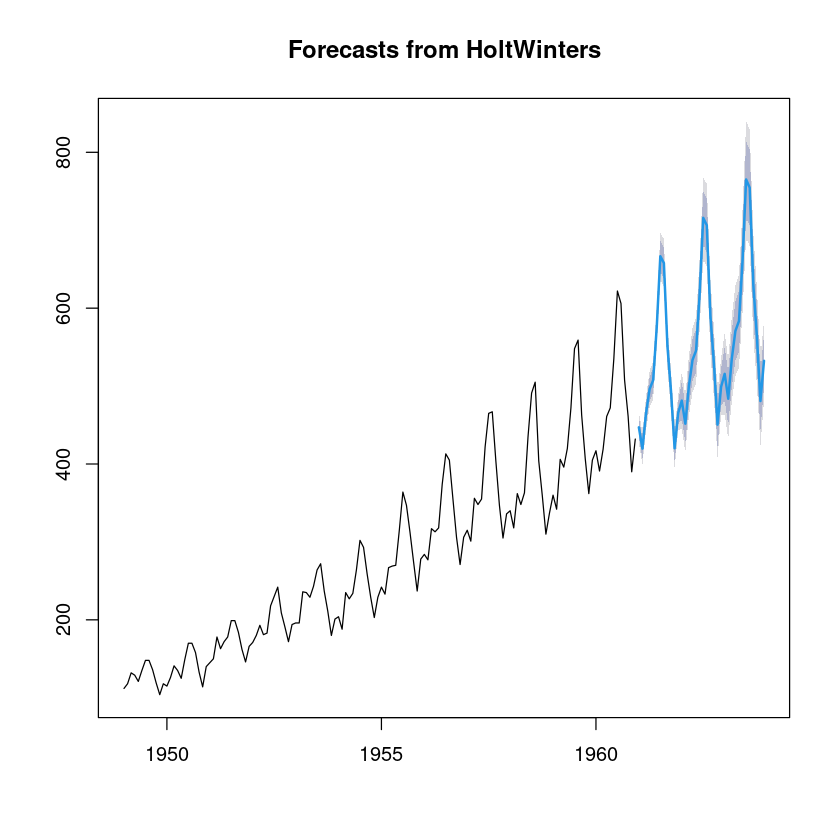

In [39]:
# 예측
plot(forecast(model_es, h=36))  # 짙은 회색 : 95%신뢰구간, 옅은 회색 : 80% 신뢰구간

# # 5. 이동평균을 이용한 예측

**이동평균법 (Moving Average Method)**

- 최근의 $m$개의 값들만을 이동하여 평균을 구하는 방법.
- 지엽적인 변동은 제거하여 장기적인 추세 파악이 가능하다.
- 계산법이 쉽고 많은 자료의 저장이 필요 없다.
- 예측의 목적보다는 주로 분해법에서 계절조정을 하는데 사용한다.

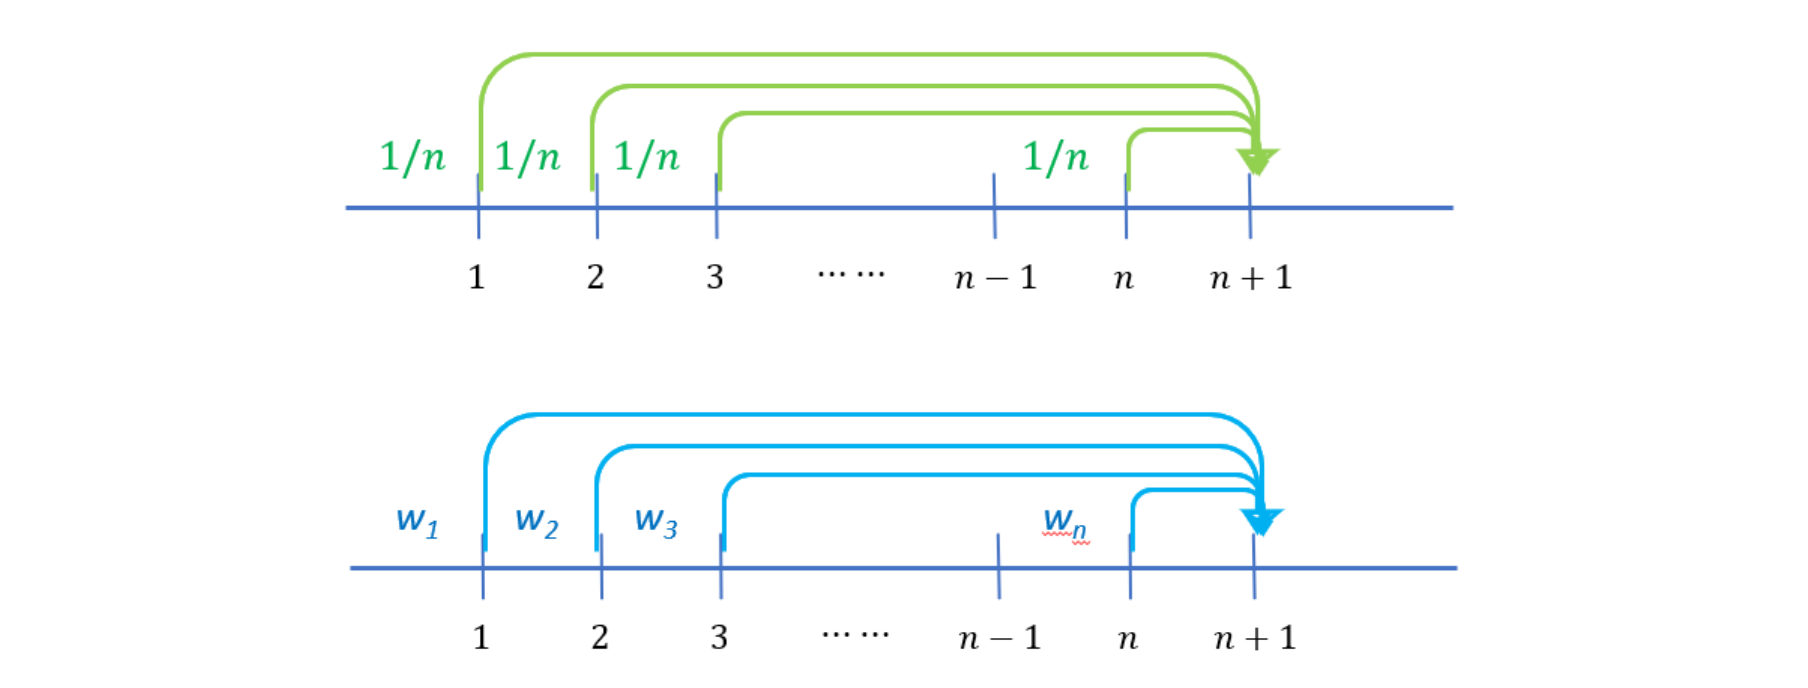

단순 이동평균 평활법의 경우 관측값에 대한 가중치는 모두 동일한 값으로 적용한다. 

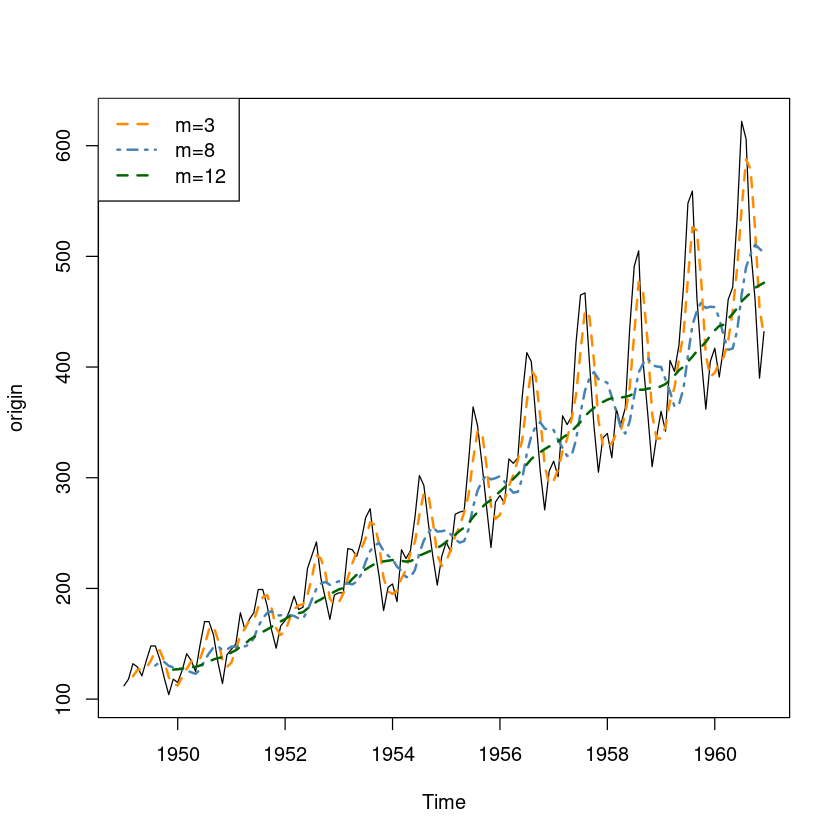

In [40]:
# 이동평균법 사용 방법
plot(origin)

library(TTR) #이동평균 SMA 함수 사용하기 위한 패키지 불러오기
originSMA3 <- SMA(origin,n=3) #window=3
lines(originSMA3, col='darkorange', lty=2, lwd=2)

originSMA8 <- SMA(origin,n=8) #window=8
lines(originSMA8, col='steelblue', lty=4, lwd=2)

originSMA12 <- SMA(origin,n=12) #window=12
lines(originSMA12, col='darkgreen', lty=2, lwd=2)

legend("topleft", c("m=3", "m=8", "m=12"), col=c("darkorange", "steelblue","darkgreen"), lty=c(2,4,2), lwd=2)

- $m$이 커질수록 스무스 해지네?
- $\text{window size}=\text{계절주기} \to$ 계절성분이 사라진다.

`-` (참고) Weighted moving average

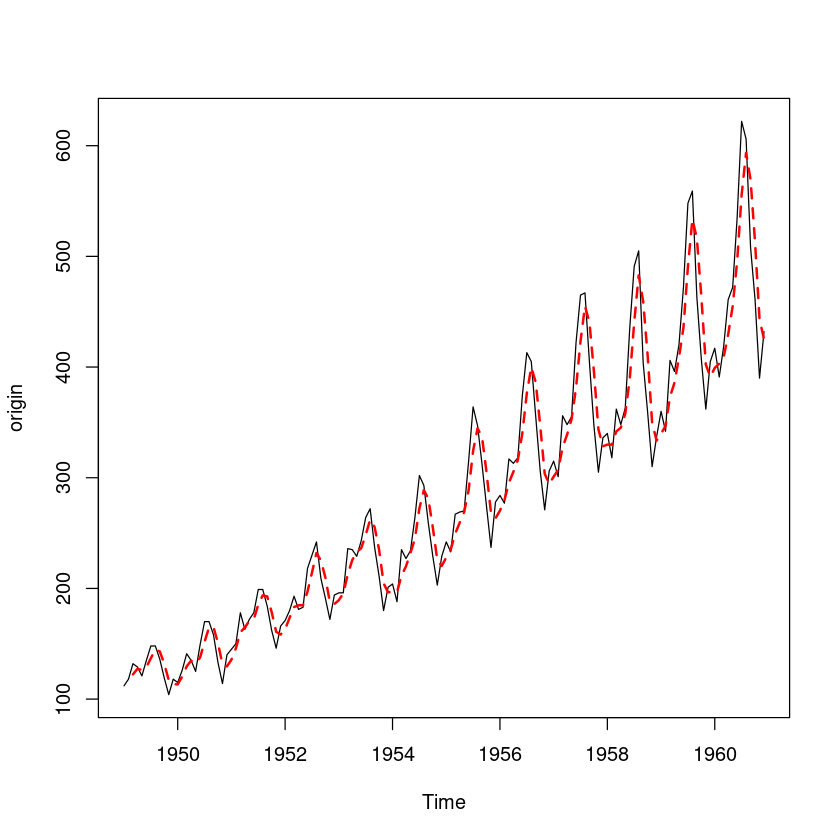

In [41]:
# weighted moving average
plot(origin)
lines(WMA(origin, n=3, wts=c(0.3,0.4,0.5)),col='red', lty=2, lwd=2)

# # 6-1. ARIMA를 이용한 예측: 로그변환

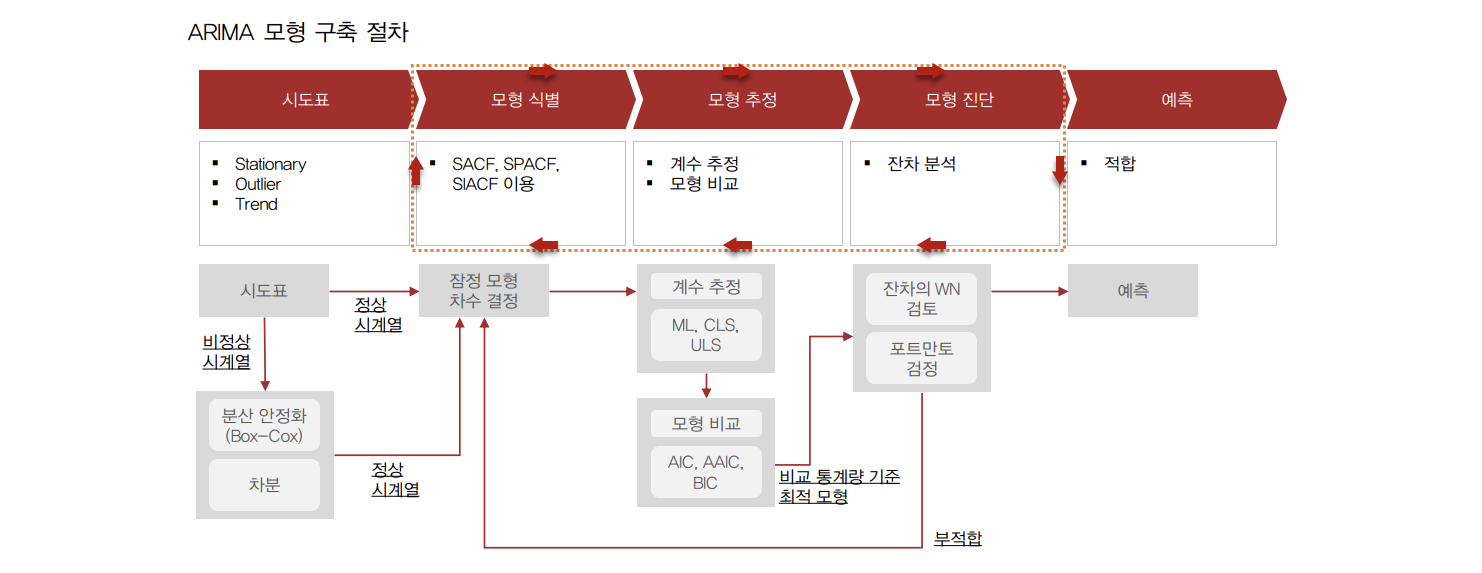

### 시도표

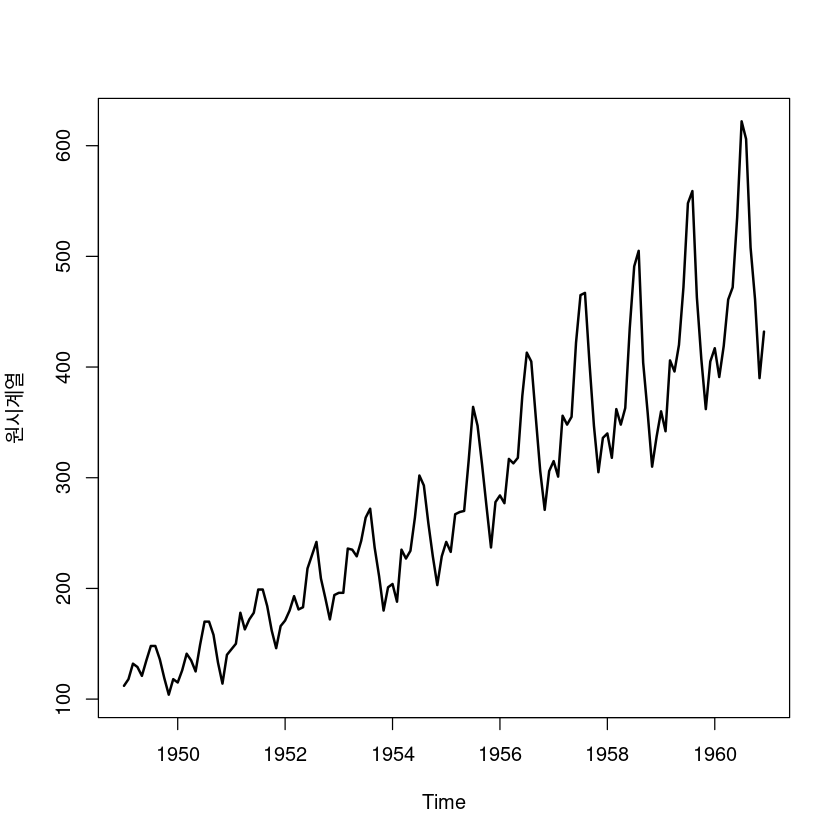

In [42]:
# 데이터 탐색 및 모형식별
# 시도표
plot(origin, lwd=2, ylab = "원시계열")

### 분산안정화

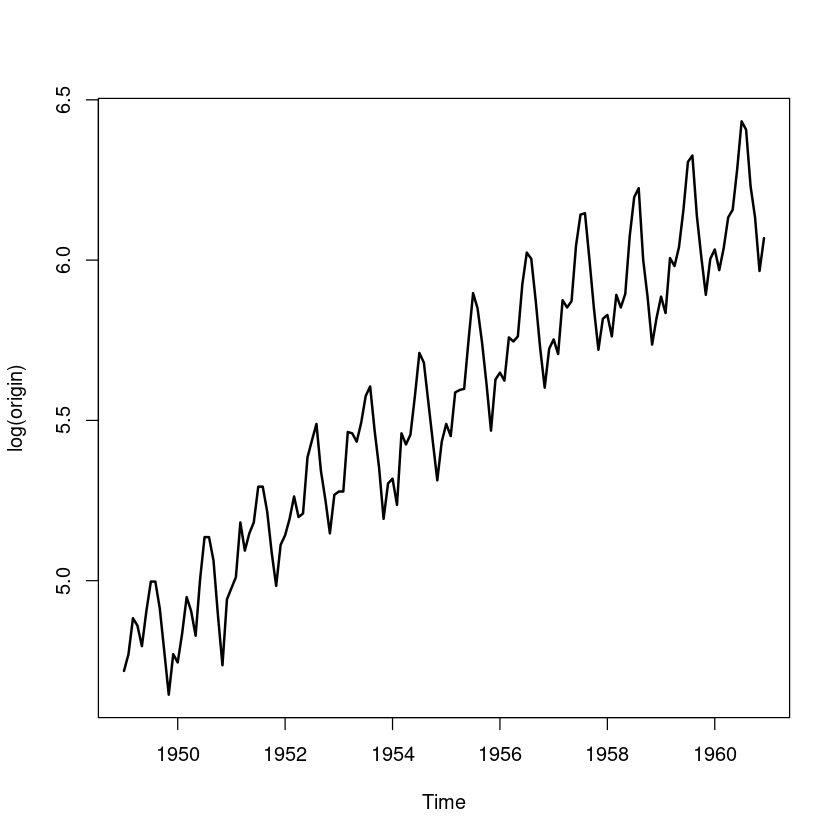

In [43]:
# 분산 안정화 - 로그변환
log_org <- log(origin)
plot(log_org, lwd=2, ylab = "log(origin)")

### 차분

[1] 0.1198215

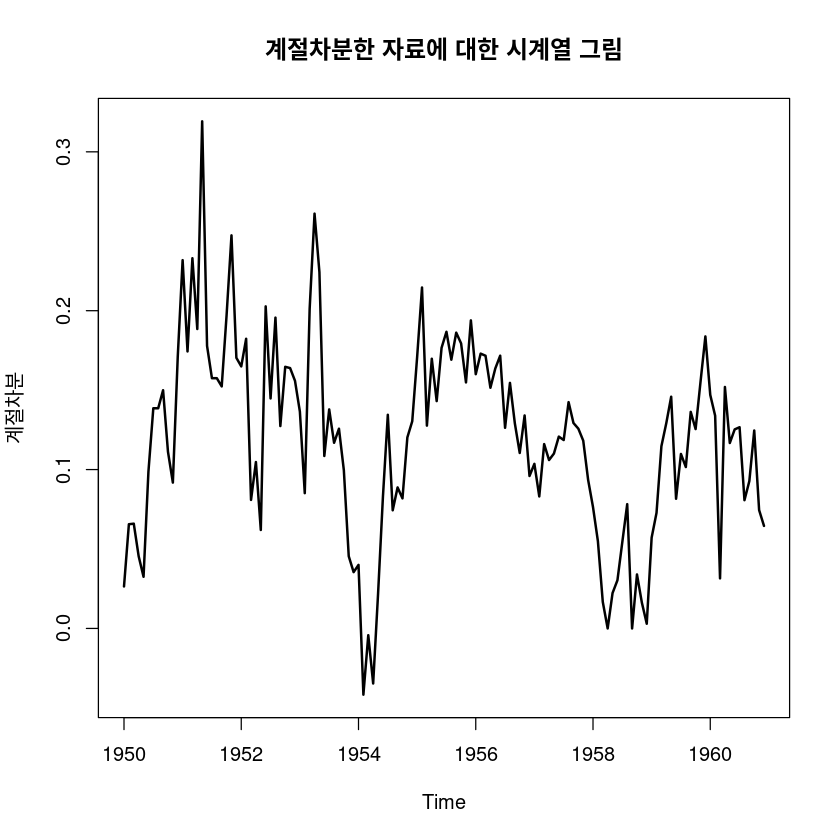

In [44]:
# 계절성분이 있으므로 계절차분
log_sdiff_org <- diff(log_org, lag=12)
plot(log_sdiff_org, lwd=2, ylab="계절차분", main ="계절차분한 자료에 대한 시계열 그림")
mean(log_sdiff_org) # 평균이 0이 아님

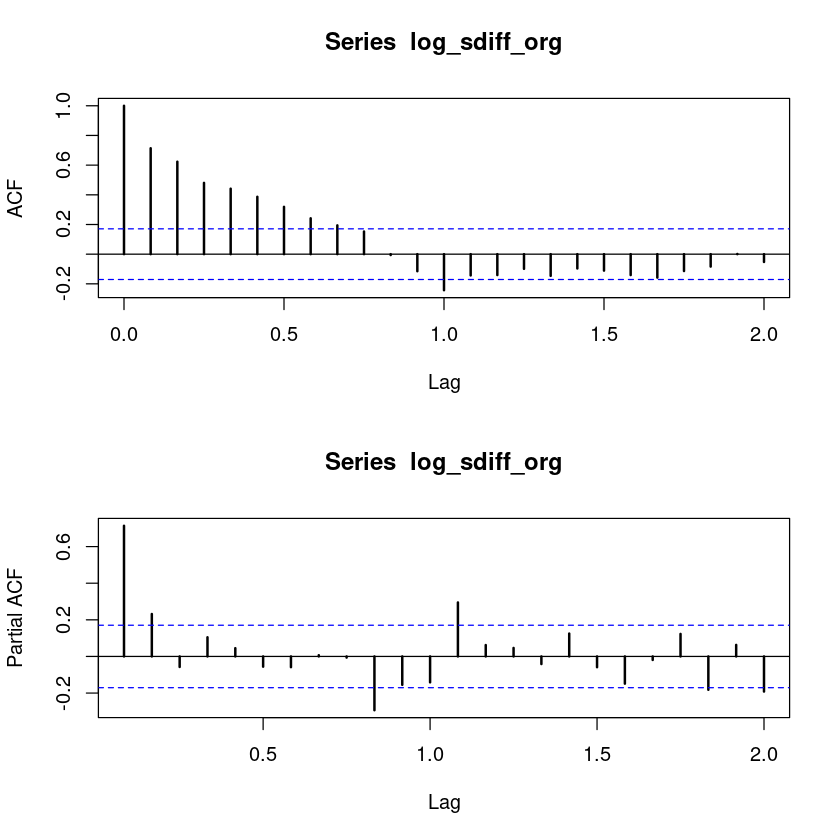

In [45]:
# ACF, PACF를 통한 탐색
layout(1:2)
acf(log_sdiff_org, lag.max = 24, lwd=2) # 차분 필요,천천히 감소
pacf(log_sdiff_org, lag.max=24, lwd=2)

#### 단위근 검정 (unit root test)

- 차분이 필요한지 검정 (단위근 검정  )
- $H_0$ : 단위근이 있다. (즉 차분이 필요하다) 

In [46]:
library(fUnitRoots)  # library for function adfTest

In [47]:
# adfTest(log_sdiff_org, lags = 1, type = "nc")  # 유의확률이 0.05보다 큼. 귀무가설 기각하지 못함. 즉 단위근이 있다고 할 수 있다.
adfTest(log_sdiff_org, lags = 1, type = "c")   # 유의확률이 0.05보다 작음. 귀무가설 기각. 즉 단위근이 있다고 할 수 없다.
# adfTest(log_sdiff_org, lags = 1, type = "ct")  # 유의확률이 0.05보다 작음. 귀무가설 기각. 즉 단위근이 있다고 할 수 없다.


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -3.3423
  P VALUE:
    0.01703 

Description:
 Fri Jul 28 13:20:51 2023 by user: 

- 유의확률이 0.05보다 작으므로 귀무가설을 기각할 수 있다. 즉, 단위근이 있다고 할 수 없다.

In [48]:
ndiffs(log_sdiff_org, test = "kpss")
ndiffs(log_sdiff_org, test = "adf") ## 
ndiffs(log_sdiff_org, test = "pp")

[1] 1

[1] 0

[1] 0

- 세가지 방법으로 시행한 단위근 검정 결과가 다르다.

In [49]:
# 차분 실행 
log_sdiff_diff_org <- diff(log_sdiff_org, lag=1)
#log_sdiff_diff_org <- diff(diff(log_org), lag=12) 

- 분석을 할 때는 계절차분을 먼저하고 일반차분이 필요한 경우 진행해 준다. 하지만, 결과적으로 "계절차분->일반차분"을 하는 것과 "일반차분->계절차분"을 하는 것은 동일한 결과를 갖는다.

`-` 계절차분->일반차분 vs. 일반차분 -> 계절차분

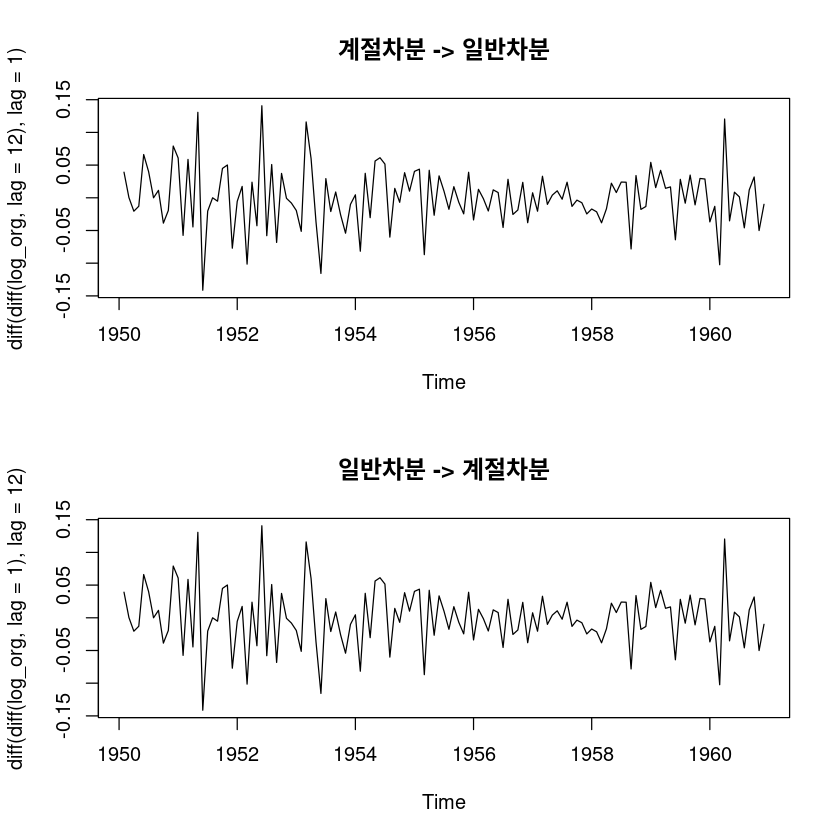

In [50]:
par(mfrow=c(2,1))
plot(diff(diff(log_org, lag=12),lag=1), main='계절차분 -> 일반차분')
plot(diff(diff(log_org, lag=1),lag=12), main='일반차분 -> 계절차분')

`-` 계절차분만 진행

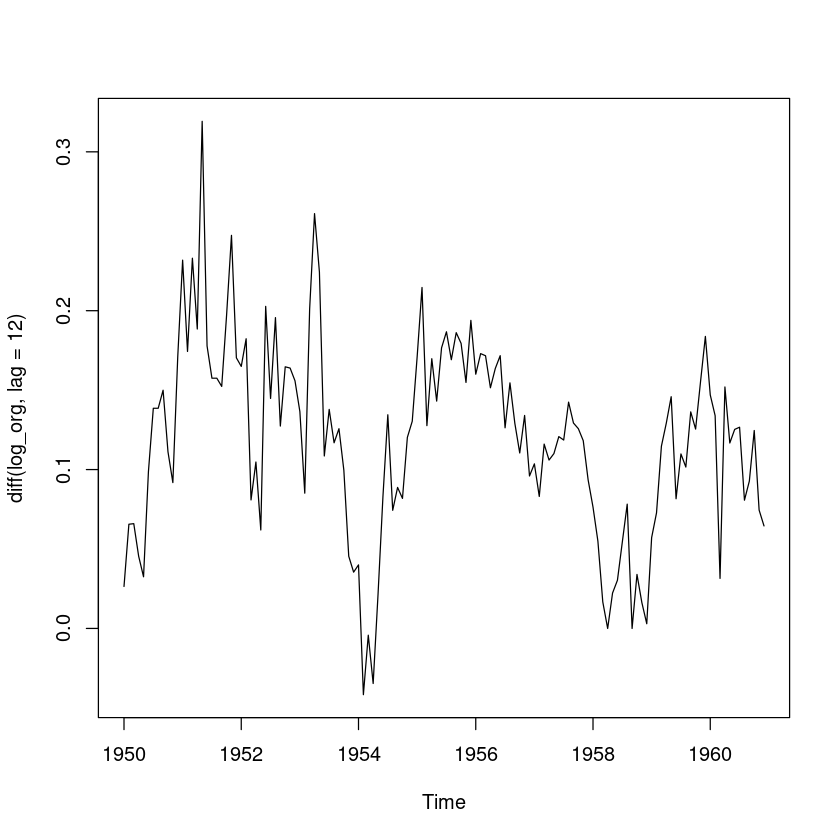

In [51]:
plot(diff(log_org, lag=12))

- 계절성은 보이지 않는다.
- 계절 차분한 시계열에 대한 시도표에서 약간의 확률적 추세가 존재한다.

`-` 일반차분만 진행

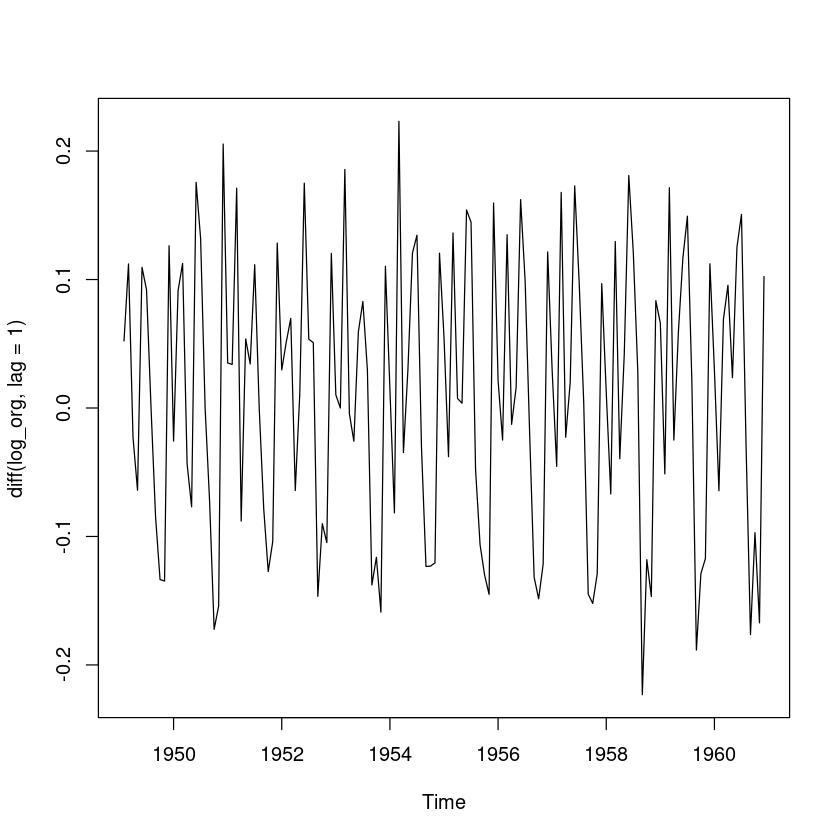

In [52]:
plot(diff(log_org, lag=1))

- 1년 단위로 비슷한 패턴이 나타나는데? (계절성) $\to$ 계절차분을 해줘야 겠어!
- (참고) 일반차분으로는 계절성을 제거하기 어렵다.

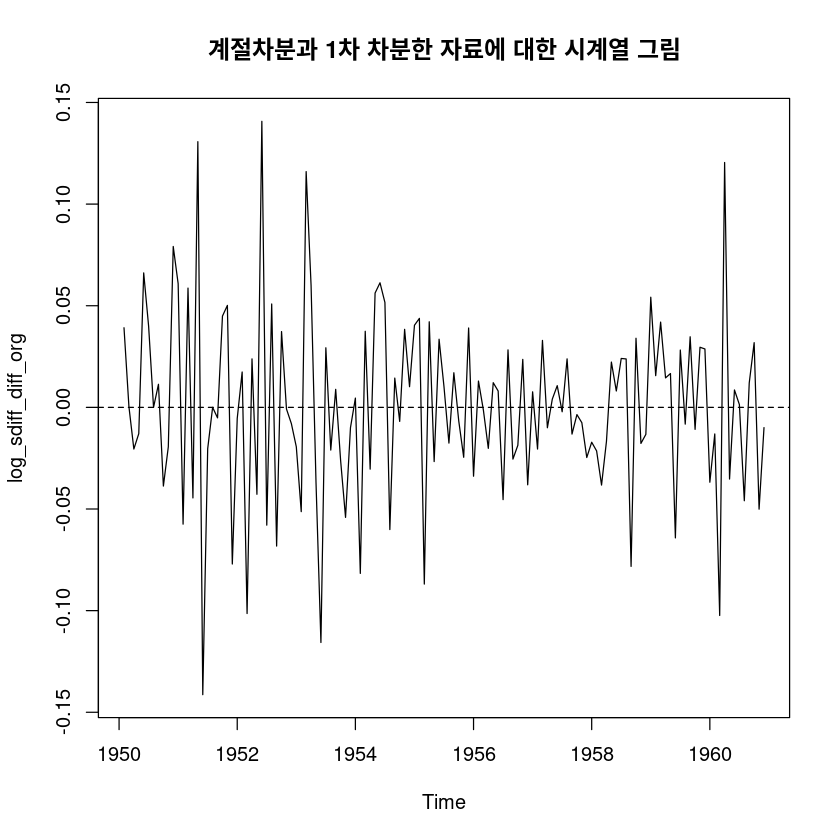

In [53]:
par(mfrow=c(1,1))
plot(log_sdiff_diff_org, main = "계절차분과 1차 차분한 자료에 대한 시계열 그림")
abline(h=0, lty=2)

In [54]:
# diff(diff(log_org, lag=12),lag=1) == diff(diff(log_org, lag=1),lag=12)

### ACF, PACF

- ACF $\to$ MA모형의 차수 $q, Q$
- PACF $\to$ AR모형의 차수 $p, P$

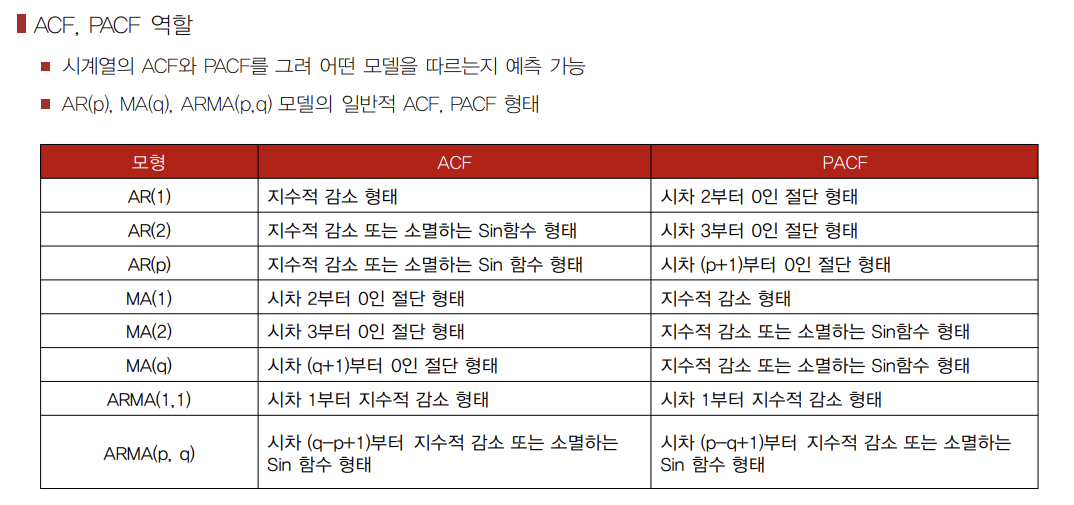

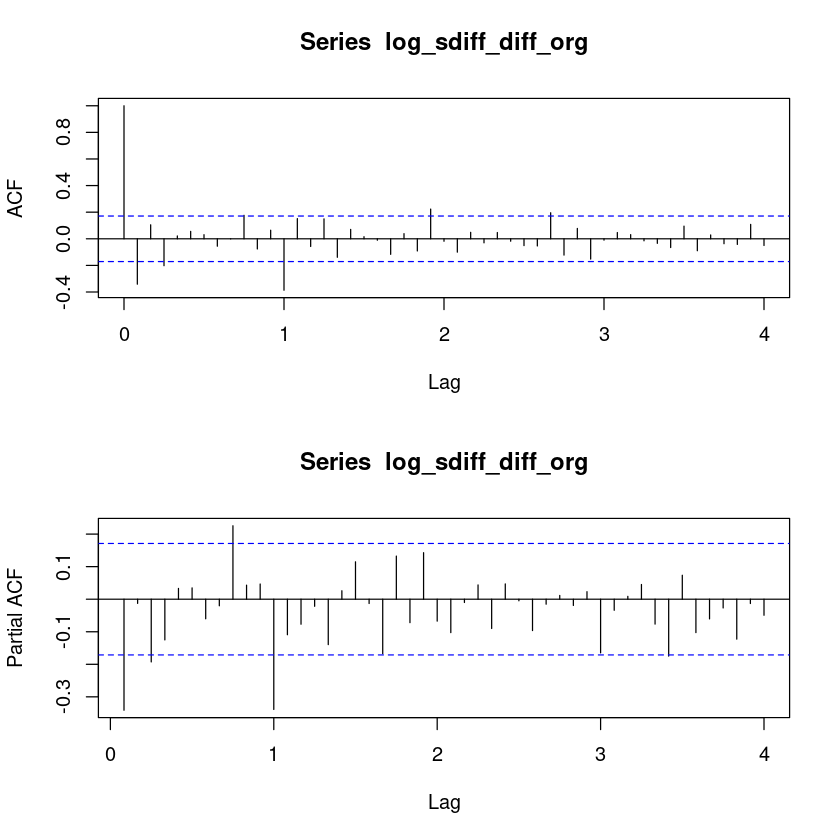

In [55]:
layout(1:2)
acf(log_sdiff_diff_org, lag.max = 48) # lag=1,3,12에서 0이 아닌 값.
# 비계절 시차 4부터 절단 -> MA(3), 계절 -> 시차 2부터 절단 SMA(1)

pacf(log_sdiff_diff_org, lag.max = 48) # lag=1,9
# 시차 1와 9에서 0보다 큰 값을 가짐 -> AR(3), 계절 : 시차2부터 절단 ->  SAR(1) 

### auto.arima를 이용한 모형 선택

In [56]:
# auto.arima를 통해 aic가 최소가 되는 order 값 구함
auto.arima(log_sdiff_diff_org, max.p = 3, max.q=3, max.Q=1, trace = T)  #trace = T 옵션을 사용하면 모형 선택 과정 확인 가능
auto.arima(log_org, max.p = 3, max.q=3, max.Q=1, trace = T)


 ARIMA(2,0,2)(1,0,1)[12] with non-zero mean : Inf
 ARIMA(0,0,0)            with non-zero mean : -432.7415
 ARIMA(1,0,0)(1,0,0)[12] with non-zero mean : -472.4968
 ARIMA(0,0,1)(0,0,1)[12] with non-zero mean : -481.1033
 ARIMA(0,0,0)            with zero mean     : -434.799
 ARIMA(0,0,1)            with non-zero mean : -447.8018
 ARIMA(0,0,1)(1,0,1)[12] with non-zero mean : -479.454
 ARIMA(0,0,1)(1,0,0)[12] with non-zero mean : -475.0825
 ARIMA(0,0,0)(0,0,1)[12] with non-zero mean : -465.3811
 ARIMA(1,0,1)(0,0,1)[12] with non-zero mean : -479.4557
 ARIMA(0,0,2)(0,0,1)[12] with non-zero mean : -479.1627
 ARIMA(1,0,0)(0,0,1)[12] with non-zero mean : -479.1871
 ARIMA(1,0,2)(0,0,1)[12] with non-zero mean : Inf
 ARIMA(0,0,1)(0,0,1)[12] with zero mean     : -483.204
 ARIMA(0,0,1)            with zero mean     : -449.8846
 ARIMA(0,0,1)(1,0,1)[12] with zero mean     : -481.5888
 ARIMA(0,0,1)(1,0,0)[12] with zero mean     : -477.2096
 ARIMA(0,0,0)(0,0,1)[12] with zero mean     : -467.459
 ARIMA(

Series: log_sdiff_diff_org 
ARIMA(0,0,1)(0,0,1)[12] with zero mean 

Coefficients:
          ma1     sma1
      -0.4018  -0.5569
s.e.   0.0896   0.0731

sigma^2 = 0.001369:  log likelihood = 244.7
AIC=-483.39   AICc=-483.2   BIC=-474.77


 ARIMA(2,1,2)(1,1,1)[12]                    : Inf
 ARIMA(0,1,0)(0,1,0)[12]                    : -434.799
 ARIMA(1,1,0)(1,1,0)[12]                    : -474.6299
 ARIMA(0,1,1)(0,1,1)[12]                    : -483.2101
 ARIMA(0,1,1)(0,1,0)[12]                    : -449.8857
 ARIMA(0,1,1)(1,1,1)[12]                    : -481.5957
 ARIMA(0,1,1)(1,1,0)[12]                    : -477.2164
 ARIMA(0,1,0)(0,1,1)[12]                    : -467.4644
 ARIMA(1,1,1)(0,1,1)[12]                    : -481.582
 ARIMA(0,1,2)(0,1,1)[12]                    : -481.2991
 ARIMA(1,1,0)(0,1,1)[12]                    : -481.3006
 ARIMA(1,1,2)(0,1,1)[12]                    : -481.5633

 Best model: ARIMA(0,1,1)(0,1,1)[12]                    



Series: log_org 
ARIMA(0,1,1)(0,1,1)[12] 

Coefficients:
          ma1     sma1
      -0.4018  -0.5569
s.e.   0.0896   0.0731

sigma^2 = 0.001371:  log likelihood = 244.7
AIC=-483.4   AICc=-483.21   BIC=-474.77

`-` model1's Best model: **ARIMA(0,0,1)(0,0,1)[12]**

```
Coefficients:
          ma1     sma1
      -0.4018  -0.5569
s.e.   0.0896   0.0731
```

`-` model2's Best model: **ARIMA(0,1,1)(0,1,1)[12]**

```
Coefficients:
          ma1     sma1
      -0.4018  -0.5569
s.e.   0.0896   0.0731
```

- 두 모형의 MS, SMA 계수의 추정값이 동일하다.

`-` 차분에 대한 추가 분석

In [57]:
auto.arima(log_sdiff_org, max.p = 3, max.q=3, max.Q=1, trace = F)

Series: log_sdiff_org 
ARIMA(0,1,1)(0,0,1)[12] 

Coefficients:
          ma1     sma1
      -0.4018  -0.5569
s.e.   0.0896   0.0731

sigma^2 = 0.001369:  log likelihood = 244.7
AIC=-483.39   AICc=-483.2   BIC=-474.77

- auto.arima는 `ndiffs()`를 이용하여 차분이 몇 번 필요한지 test를 진행한다. (kpss)
- 이 경우 1번 차분이 필요하다고 결정하여 $d=1$로 고정시키고 모형 선택을 진행하였다.
- 최종선택된 모형의 AIC 값은 $-483.39$ 이다.

(참고) 위에서는 계절 차분 후에 일반차분 (d=1)이 필요하다고 결정을 내리기는 했지만, adf.test의 결과 차분이 필요하지 않다고 판단할 수도 있다.

`-` 차분을 하지 않는 것으로 고정 ($d=0$)

In [58]:
auto.arima(log_sdiff_org, d=0, max.p = 3, max.q=3, max.Q=1, trace = F)

Series: log_sdiff_org 
ARIMA(2,0,0)(0,0,1)[12] with non-zero mean 

Coefficients:
         ar1     ar2     sma1    mean
      0.5754  0.2614  -0.5554  0.1185
s.e.  0.0843  0.0842   0.0771  0.0091

sigma^2 = 0.001321:  log likelihood = 249.65
AIC=-489.3   AICc=-488.82   BIC=-474.88

- 이 때 최종 선택된 모형의 AIC는 -489.3 이다. 
- 차분을 하지 않은 경우의 모형 적합 결과가 더 좋다.

- $AIC_{차분O} > AIC_{차분X}$^[AIC, BIC는 작을수록 좋다.] 이므로 여기서는 차분을 하지 않은 모형이 적합결과가 더 좋다. 따라서 차분에 대해서는 생각해 볼 여지가 있다.

::: {.callout-note}
회귀에서 예측변수(predictor)를 고를 때 유용했던 아카이케(Akaike)의 정보 기준(AIC; Akaike’s information Criterion)이 ARIMA 모델에서 차수를 결정할 때도 유용합니다.

이러한 정보 기준이 모델의 적절한 차분 차수($d$)를 고를 때 별로 도움이 되지 않는 경향이 있고, $p$와 $q$ 값을 고를 때만 도움이 된다는 것은 중요한 점입니다. 차분을 구하는 것을 통해 가능도(우도; likelihood)를 계산하는 데이터가 바뀌기 때문에, 서로 다른 차수로 차분을 구한 모델의 AIC 값을 비교할 수 없게 됩니다. 그래서 $d$를 고르기 위해 다른 방법을 사용해야 하고, 그리고 나서 $p$와 $q$를 고르기 위해 AIC를 사용할 수 있습니다.
:::

`-` 모형 구축

In [59]:
# 모형 구축
model_arima <- arima(log_sdiff_diff_org, order=c(0,0,1), seasonal = list(order = c(0,0,1), period = 12))
model_arima <- arima(log_org, order=c(0,1,1), seasonal = list(order = c(0,1,1), period = 12))
# model_arima <- arima(log_org, order=c(2,0,0), seasonal = list(order = c(0,1,1), period = 12))

### 모형 진단

잔차검정: 추정된 잔차들로부터 white noise 성질을 검토.
- 잔차의 평균은 $0$에 가까움.
- 잔차의 분산은 상수.
- 잔차의 자기상관은 무시할 만큼 작음.

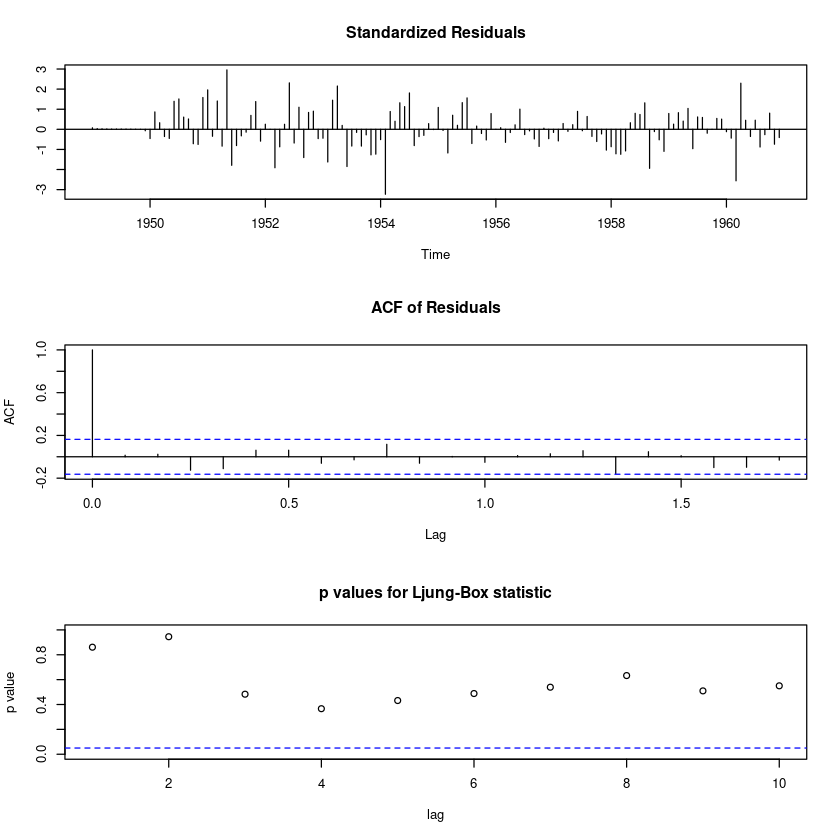

In [60]:
tsdiag(model_arima)

In [66]:
mean(resid(model_arima))

[1] 0.0005730622

- 종합적으로 잔차가 백색잡음이라는 것에 크게 위배되는 부분이 없다.

In [61]:
# 독립성 검정
Box.test(model_arima$residuals, lag=1, type="Ljung-Box") #H0 : rho1 = 0
Box.test(model_arima$residuals, lag=5, type="Ljung-Box") #H0 : rho1 = ... = rho5 = 0
Box.test(model_arima$residuals, lag=10, type="Ljung-Box") #H0 : rho1 = ... = rho10 = 0


	Box-Ljung test

data:  model_arima$residuals
X-squared = 0.030651, df = 1, p-value = 0.861



	Box-Ljung test

data:  model_arima$residuals
X-squared = 4.8694, df = 5, p-value = 0.432



	Box-Ljung test

data:  model_arima$residuals
X-squared = 8.8097, df = 10, p-value = 0.5503


- 잔차의 독립성, 등분산성, 정규성 만족

[1] 103.1248

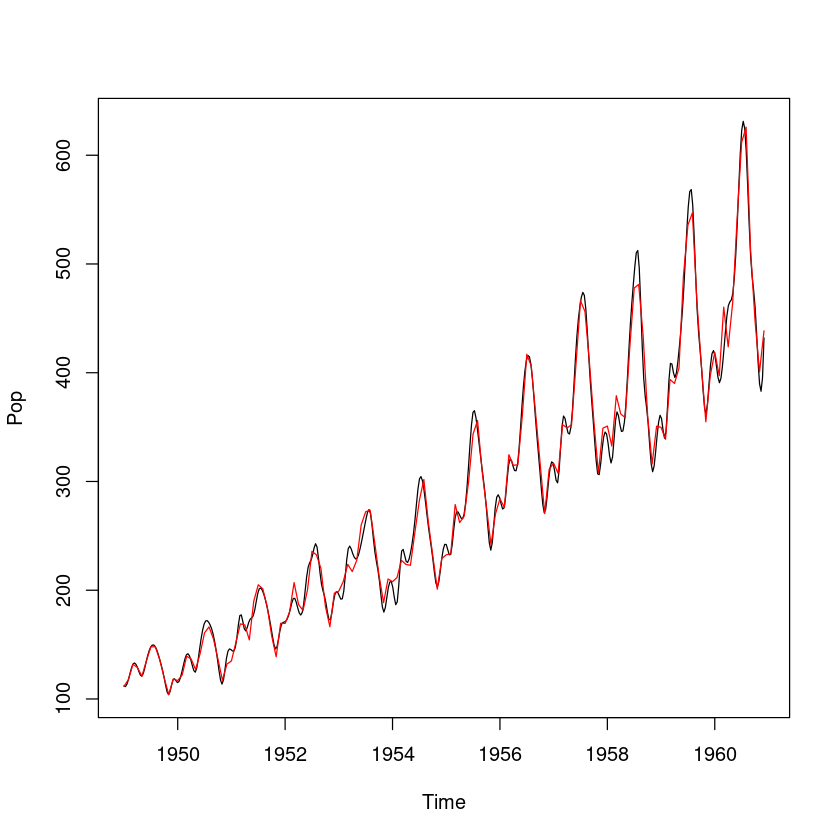

In [114]:
# 원 데이터 및 fitted 데이터의 비교
par(mfrow=c(1,1))
plot(spline(time(origin), origin),type='l',xlab='Time',ylab='Pop')
lines(exp(fitted(model_arima)), col='red') #역변환 필요
mean((origin - exp(fitted(model_arima)))^2) #MSE

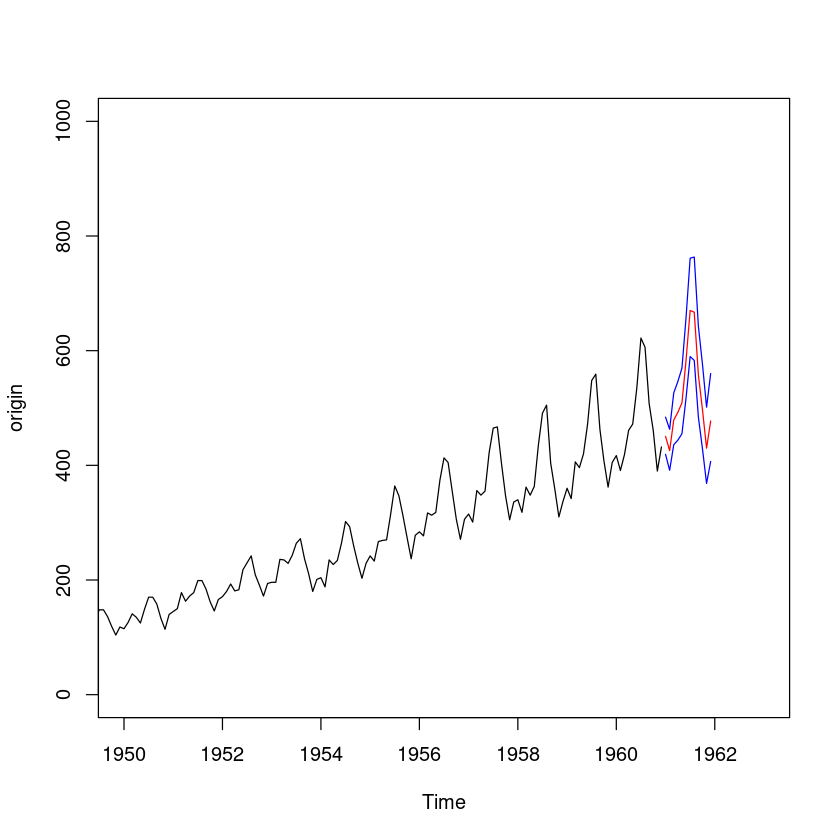

In [115]:
# 12개월 예측
arima_fit <- predict(model_arima, n.ahead=12) #로그변환한 데이터 사용
ts.plot(origin, xlim=c(1950,1963), ylim = c(0, 1000))
lines(exp(arima_fit$pred),col="red")
lines(exp(arima_fit$pred+1.96*arima_fit$se),col="blue",lty=1)
lines(exp(arima_fit$pred-1.96*arima_fit$se),col="blue",lty=1)

# # 6-2. ARIMA를 이용한 예측: BoxCox 변환

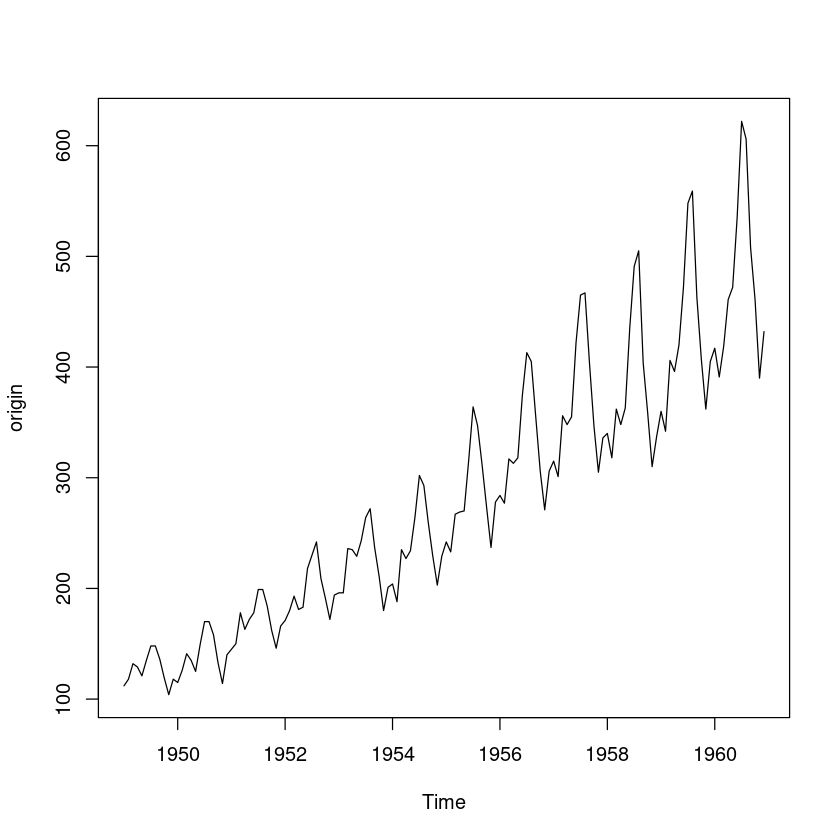

In [116]:
# 데이터 탐색 및 모형식별
# 시도표
plot(origin)

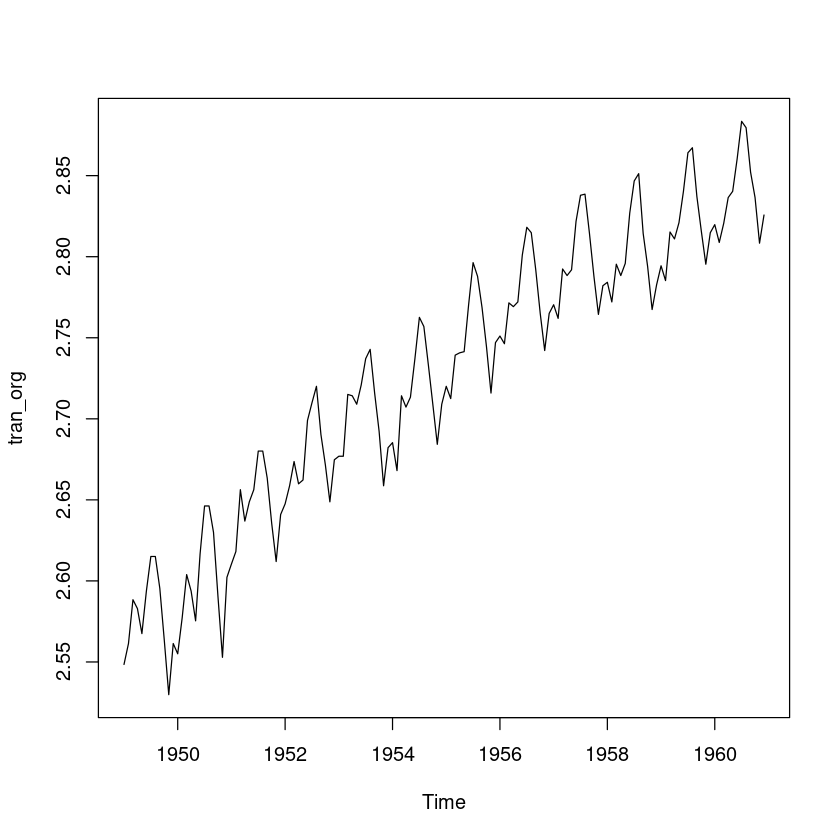

In [117]:
# 분산 안정화
tran_org <- BoxCox(origin, BoxCox.lambda(origin))
plot(tran_org)
# plot(log(tran_org))  

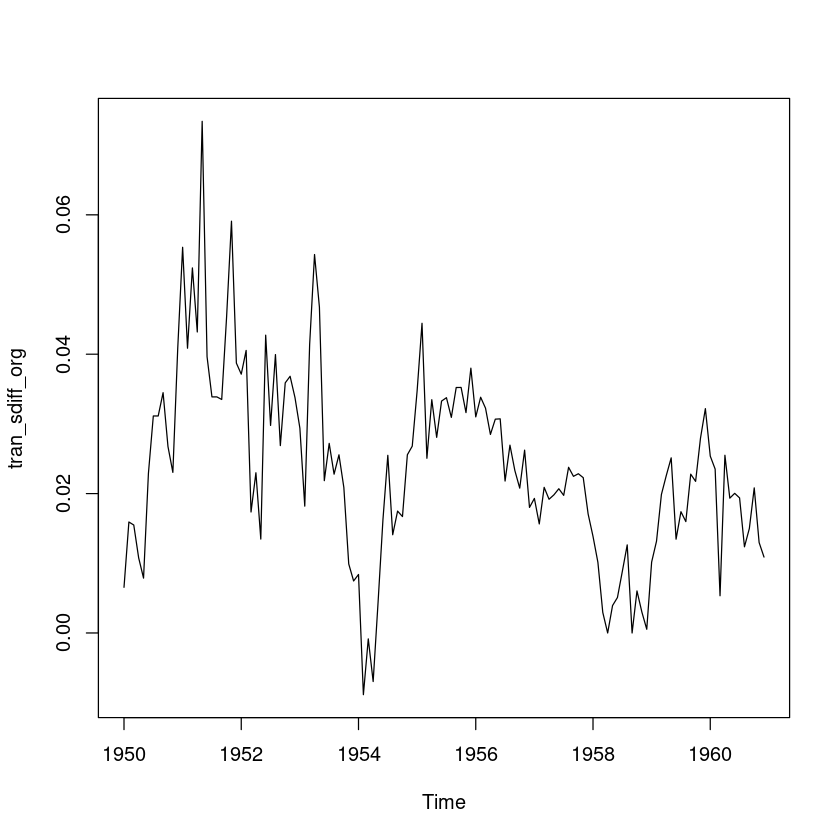

In [119]:
# 계절성분이 있으므로 계절차분
tran_sdiff_org <- diff(tran_org, lag=12)
plot(tran_sdiff_org)

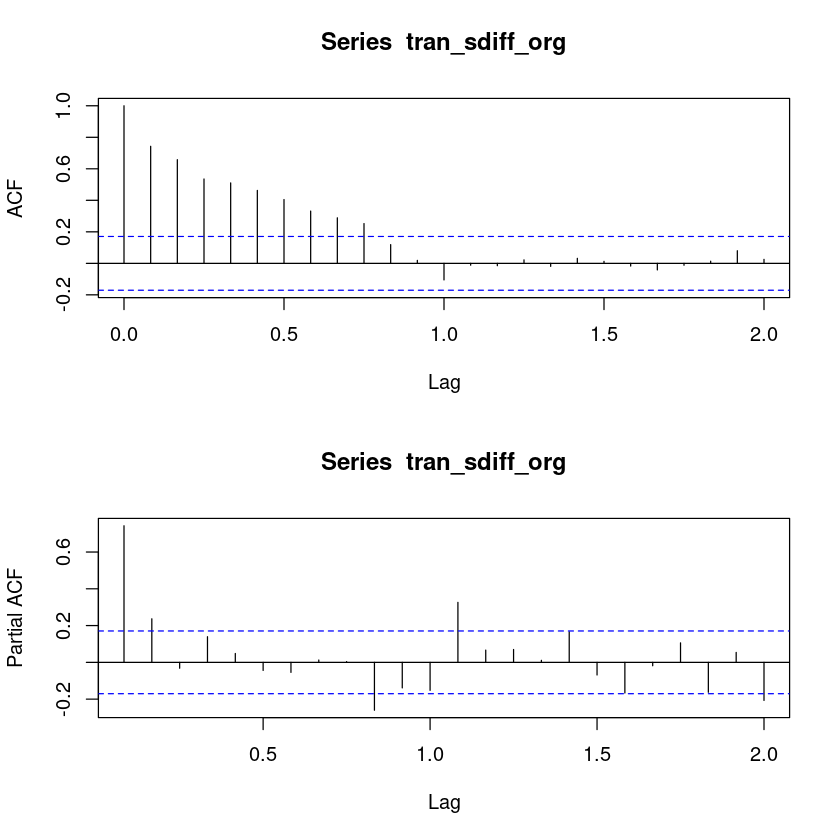

In [173]:
# ACF, PACF를 통한 탐색
layout(1:2)
acf(tran_sdiff_org, lag.max = 24) # 차분 필요
pacf(tran_sdiff_org, lag.max=24)

In [121]:
# 차분이 필요한지 검정 : 단위근 검정  H0 : 단위근이 있다.(즉 차분이 필요하다) 
library(fUnitRoots)  # library for function adfTest
adfTest(tran_sdiff_org, lags = 1, type = "c")  


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -3.0987
  P VALUE:
    0.0309 

Description:
 Wed Jul 26 07:17:29 2023 by user: 

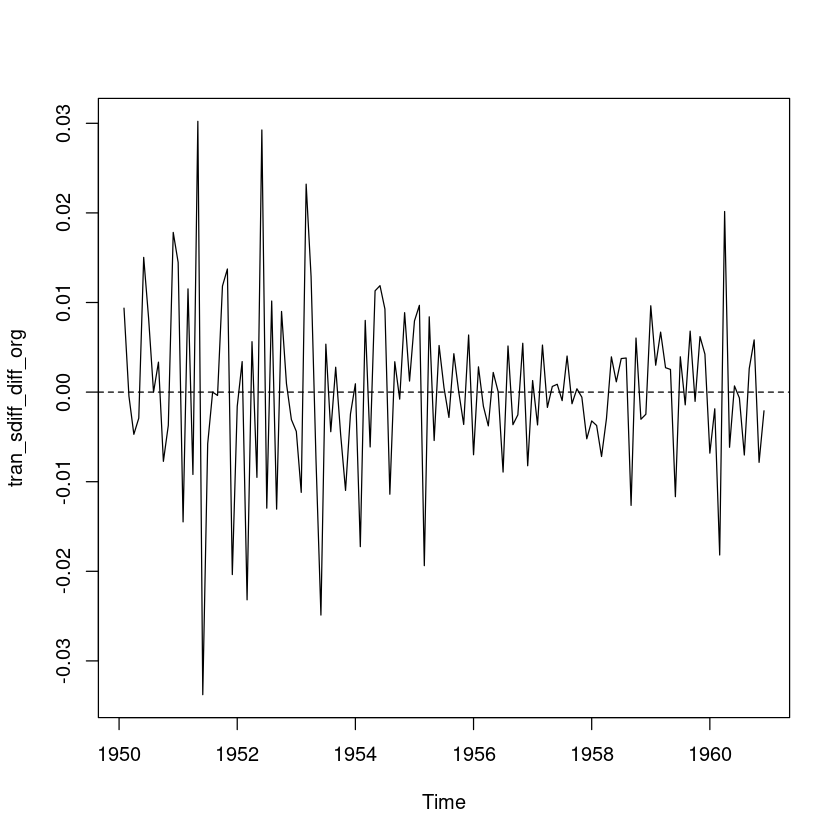

In [122]:
# 차분 실행 
tran_sdiff_diff_org <- diff(tran_sdiff_org, lag=1)
par(mfrow=c(1,1))
plot(tran_sdiff_diff_org)
abline(h=0, lty=2)

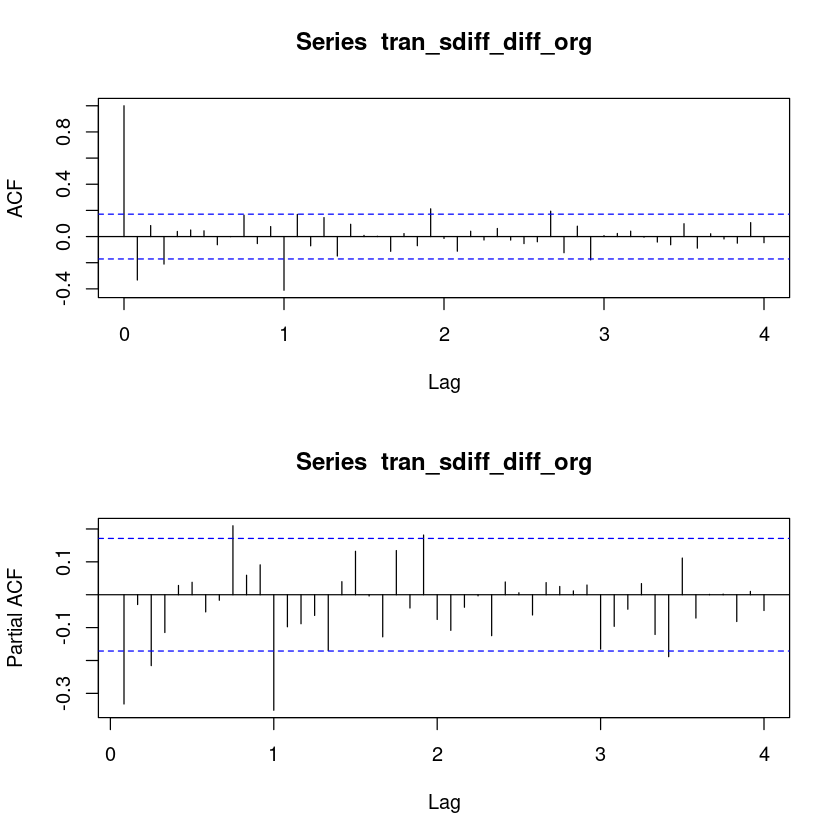

In [124]:
tran_sdiff_diff_org <- diff(diff(tran_org), lag=12)
# tran_sdiff_diff_org 
layout(1:2)
acf(tran_sdiff_diff_org, lag.max = 48) # lag=1,3,12에서 0이 아닌 값.
# acf는 lag=1,3,12에서 0이 아닌값 가짐  비계절 시차 4부터 절단 -> MA(3), 계절 -> 시차 2부터 절단 SMA(1)
pacf(tran_sdiff_diff_org, lag.max = 48) # lag=1,9
# 시차 1와 9에서 0보다 큰 값을 가짐 -> AR(3), 계절 : 시차2부터 절단 ->  SAR(1) 

In [138]:
cat('model1')
auto.arima(tran_sdiff_diff_org, max.p = 3, max.q=3, max.Q=1, trace = F)  #trace = T: 모형 선택 과정 확인 가능
cat('------------------------------------------------','\n')
cat('model2')
auto.arima(tran_org, max.p = 3, max.q=3, max.Q=1, trace = F)
# 두 개 모형의 MA, SMA 계수의 추정값이 동일

model1

Series: tran_sdiff_diff_org 
ARIMA(0,0,1)(0,0,1)[12] with zero mean 

Coefficients:
          ma1     sma1
      -0.4355  -0.5847
s.e.   0.0908   0.0725

sigma^2 = 5.789e-05:  log likelihood = 451.59
AIC=-897.18   AICc=-896.99   BIC=-888.55

------------------------------------------------ 
model2

Series: tran_org 
ARIMA(0,1,1)(0,1,1)[12] 

Coefficients:
          ma1     sma1
      -0.4355  -0.5847
s.e.   0.0908   0.0725

sigma^2 = 5.855e-05:  log likelihood = 451.6
AIC=-897.19   AICc=-897.01   BIC=-888.57

In [139]:
# 모형 구축
model_arima <- arima(tran_sdiff_diff_org, order=c(0,0,1), seasonal = list(order = c(0,0,1), period = 12))
model_arima <- arima(tran_org, order=c(0,1,1), seasonal = list(order = c(0,1,1), period = 12))

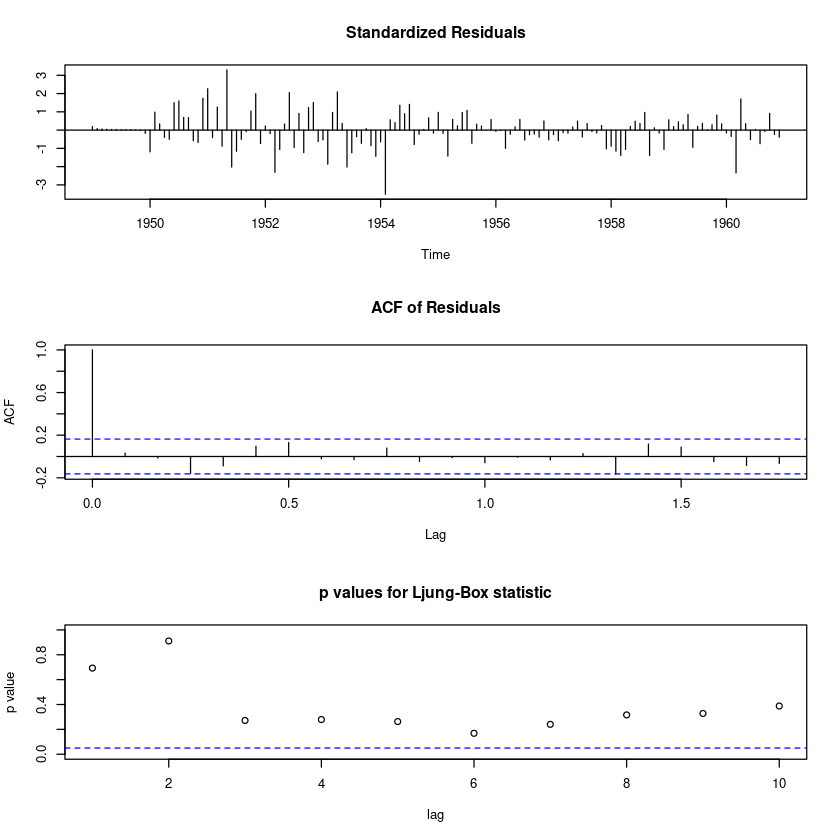

In [140]:
# 모형 검진
# 잔차 검정
tsdiag(model_arima)

In [141]:
# 독립성 검정
Box.test(model_arima$residuals, lag=1, type="Ljung-Box") #H0 : rho1 = 0
Box.test(model_arima$residuals, lag=5, type="Ljung-Box") #H0 : rho1 = ... = rho5 = 0
Box.test(model_arima$residuals, lag=10, type="Ljung-Box") #H0 : rho1 = ... = rho10 = 0


	Box-Ljung test

data:  model_arima$residuals
X-squared = 0.15595, df = 1, p-value = 0.6929



	Box-Ljung test

data:  model_arima$residuals
X-squared = 6.472, df = 5, p-value = 0.263



	Box-Ljung test

data:  model_arima$residuals
X-squared = 10.621, df = 10, p-value = 0.3878


- 잔차의 독립성, 등분산성, 정규성 만족

[1] 107.2414

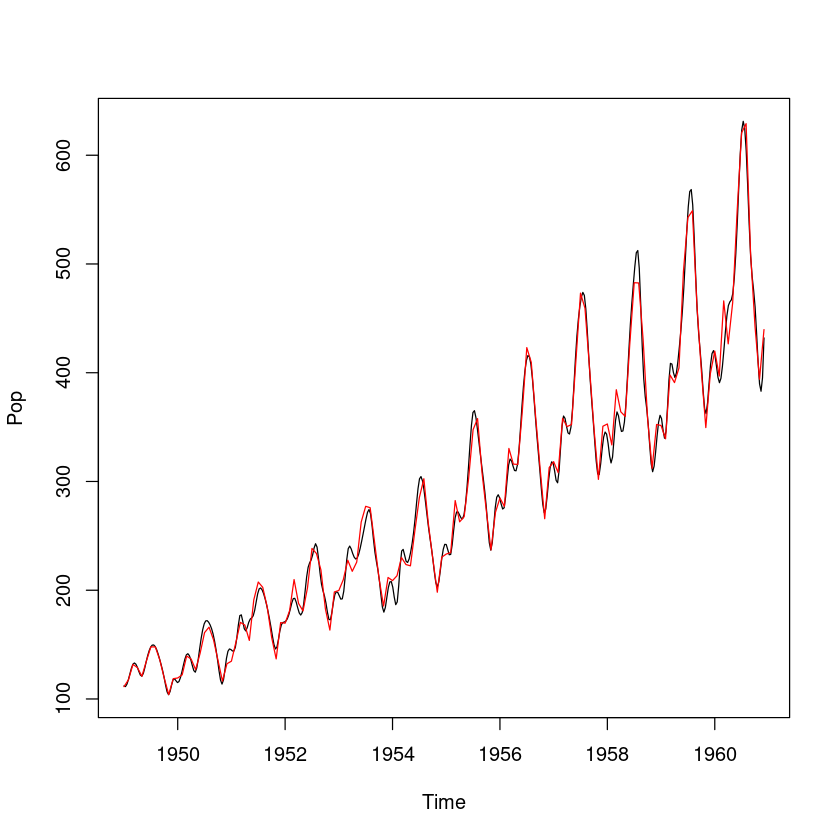

In [142]:
# 원 데이터 및 fitted 데이터의 비교
par(mfrow=c(1,1))
plot(spline(time(origin), origin),type='l',xlab='Time',ylab='Pop')
lines(InvBoxCox(fitted(model_arima), BoxCox.lambda(origin)), col='red') #역변환 필요
mean((origin - InvBoxCox(fitted(model_arima), BoxCox.lambda(origin)))^2) #MSE

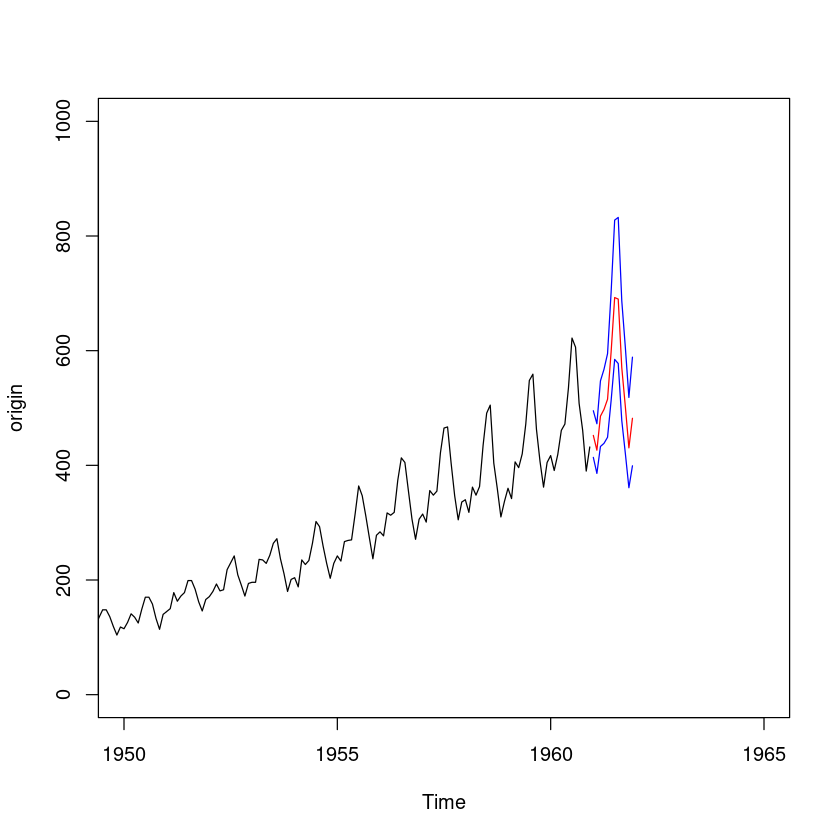

In [143]:
# 12개월 예측
arima_fit <- predict(model_arima, n.ahead=12) #BoxCox 변환 데이터 사용
lambda <- BoxCox.lambda(origin)
ts.plot(origin, xlim=c(1950,1965), ylim = c(0, 1000))
lines(InvBoxCox(arima_fit$pred, lambda),col="red")
lines(InvBoxCox(arima_fit$pred+1.96*arima_fit$se, lambda),col="blue",lty=1)
lines(InvBoxCox(arima_fit$pred-1.96*arima_fit$se, lambda),col="blue",lty=1)